In [1]:
# import required libraries
import numpy as np
print('numpy version:',np.__version__)
import pandas as pd
print('pandas version:',pd.__version__)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)
pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 400)
# file path variable
case_data = "C:/Users/Dell/Desktop/Upgrad/Lending Club Case Study/loan.csv"
loan = pd.read_csv(case_data, low_memory=False)

numpy version: 1.21.5
pandas version: 1.4.4


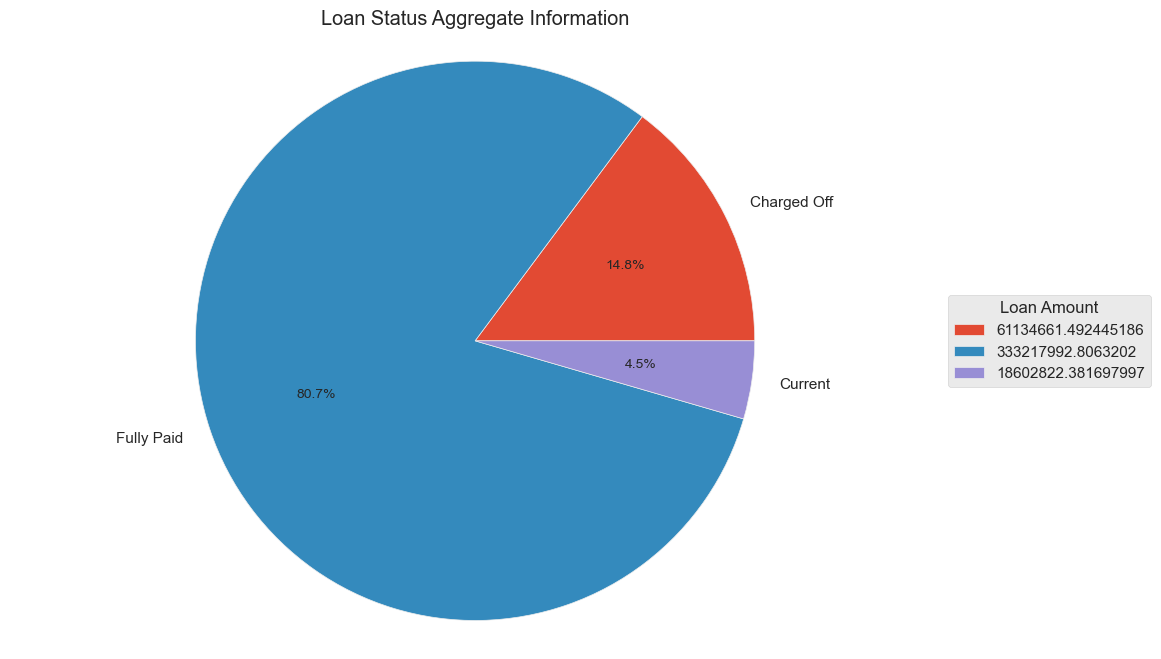

In [2]:
#   Dataset Overview

# plotting pie chart for different types of loan_status
chargedOffLoans = loan.loc[(loan["loan_status"] == "Charged Off")]
currentLoans = loan.loc[(loan["loan_status"] == "Current")]
fullyPaidLoans = loan.loc[(loan["loan_status"]== "Fully Paid")]
data  = [{"Charged Off": chargedOffLoans["funded_amnt_inv"].sum(), "Fully Paid":fullyPaidLoans["funded_amnt_inv"].sum(), "Current":currentLoans["funded_amnt_inv"].sum()}]
investment_sum = pd.DataFrame(data) 
chargedOffTotalSum = float(investment_sum["Charged Off"])
fullyPaidTotalSum = float(investment_sum["Fully Paid"])
currentTotalSum = float(investment_sum["Current"])
loan_status = [chargedOffTotalSum,fullyPaidTotalSum,currentTotalSum]
loan_status_labels = 'Charged Off','Fully Paid','Current'
plt.pie(loan_status,labels=loan_status_labels,autopct='%1.1f%%')
plt.title('Loan Status Aggregate Information')
plt.axis('equal')
plt.legend(loan_status,title="Loan Amount",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

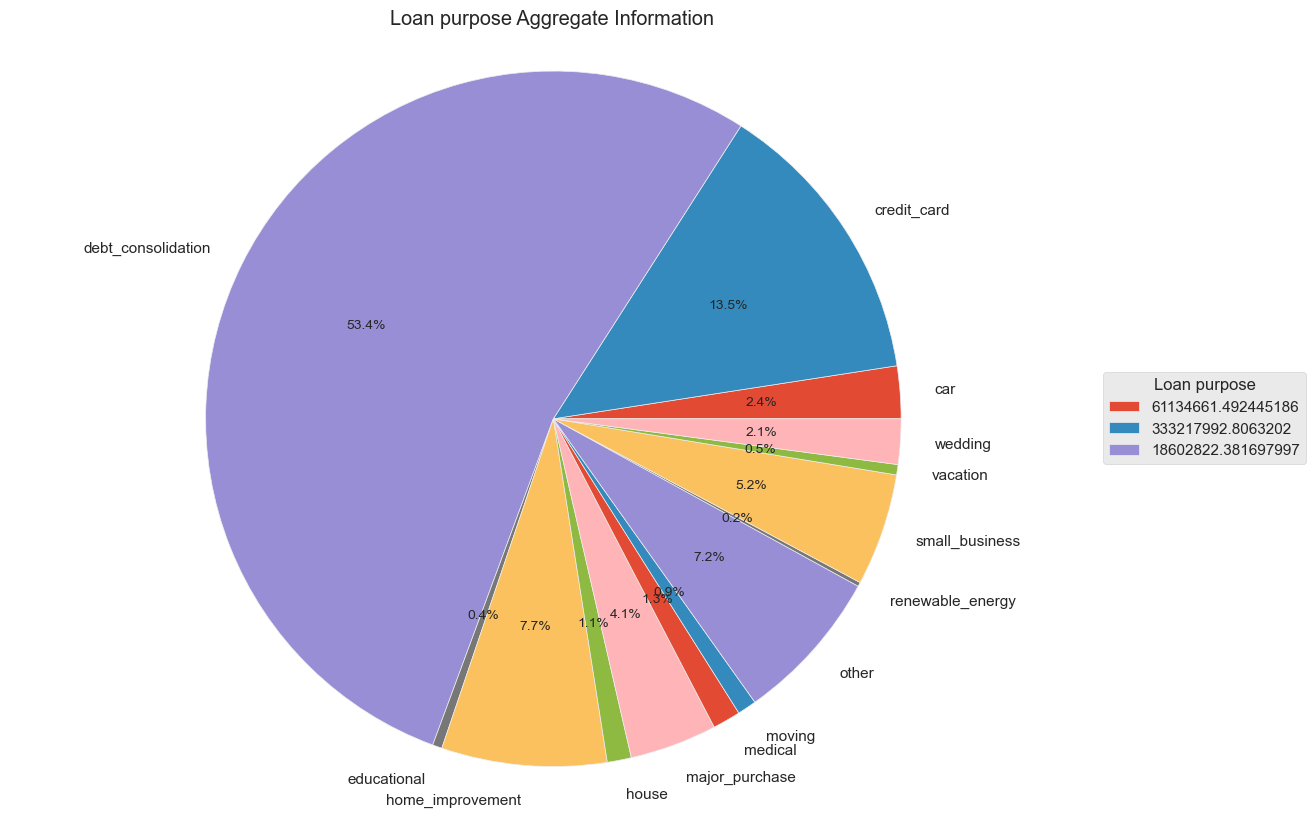

In [3]:
# plotting pie chart for different types of purpose
loans_purpose = loan.groupby(['purpose'])['funded_amnt_inv'].sum().reset_index()
plt.figure(figsize=(14, 10))
plt.pie(loans_purpose["funded_amnt_inv"],labels=loans_purpose["purpose"],autopct='%1.1f%%')
plt.title('Loan purpose Aggregate Information')
plt.axis('equal')
plt.legend(loan_status,title="Loan purpose",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

In [4]:
#          Data Cleaning
# in dataset, we can see around half of the columns are null
# completely, hence remove all columns having no values
loan = loan.dropna(axis=1, how="all")
print("Looking into remaining columns info:")
print(loan.info(max_cols=200))

Looking into remaining columns info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 

In [5]:
#Now, we will remove all the Demographic and Customer Behavioural features which
#is of no use for default analysis for credit approval.


# remove non-required columns
# id - not required
# member_id - not required
# acc_now_delinq - empty
# funded_amnt - not useful, funded_amnt_inv is useful which is funded to person
# emp_title - brand names not useful
# pymnt_plan - fixed value as n for all
# url - not useful
# desc - can be applied some NLP but not for EDA
# title - too many distinct values not useful
# zip_code - complete zip is not available
# delinq_2yrs - post approval feature
# mths_since_last_delinq - only half values are there, not much information
# mths_since_last_record - only 10% values are there
# revol_bal - post/behavioural feature
# initial_list_status - fixed value as f for all
# out_prncp - post approval feature
# out_prncp_inv - not useful as its for investors
# total_pymnt - post approval feature
# total_pymnt_inv - not useful as it is for investors
# total_rec_prncp - post approval feature
# total_rec_int - post approval feature
# total_rec_late_fee - post approval feature
# recoveries - post approval feature
# collection_recovery_fee - post approval feature
# last_pymnt_d - post approval feature
# last_credit_pull_d - irrelevant for approval
# last_pymnt_amnt - post feature
# next_pymnt_d - post feature
# collections_12_mths_ex_med - only 1 value 
# policy_code - only 1 value
# acc_now_delinq - single valued
# chargeoff_within_12_mths - post feature
# delinq_amnt - single valued
# tax_liens - single valued
# application_type - single
# pub_rec_bankruptcies - single valued for more than 99%
# addr_state - may not depend on location as its in financial domain

colsToDrop = ["id", "member_id", "funded_amnt", "emp_title", "pymnt_plan", "url", "desc", "title", "zip_code", "delinq_2yrs", "mths_since_last_delinq", "mths_since_last_record", "revol_bal", "initial_list_status", "out_prncp", "out_prncp_inv", "total_pymnt", "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d", "last_credit_pull_d", "collections_12_mths_ex_med", "policy_code", "acc_now_delinq", "chargeoff_within_12_mths", "delinq_amnt", "tax_liens", "application_type", "pub_rec_bankruptcies", "addr_state"]
loan.drop(colsToDrop, axis=1, inplace=True)
print("Features we are left with",list(loan.columns))

Features we are left with ['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc']


In [6]:
#Now, dealing with missing values by removing/imputing:

# in 12 unique values we have 10+ years the most for emp_length, 
# but it is highly dependent variable so we will not impute
# but remove the rows with null values which is around 2.5%
loan.dropna(axis=0, subset=["emp_length"], inplace=True)
# remove NA rows for revol_util as its dependent and is around 0.1%
loan.dropna(axis=0, subset=["revol_util"], inplace=True)


In [7]:
#Now, we standardize some feature columns to make data compatible for analysis:
# update int_rate, revol_util without % sign and as numeric type
loan["int_rate"] = pd.to_numeric(loan["int_rate"].apply(lambda x:x.split('%')[0]))
loan["revol_util"] = pd.to_numeric(loan["revol_util"].apply(lambda x:x.split('%')[0]))
# remove text data from term feature and store as numerical
loan["term"] = pd.to_numeric(loan["term"].apply(lambda x:x.split()[0]))

In [8]:
#Removing records with loan status as “Current”, as the loan is currently 
#running and we can’t infer any information regarding default from such loans.


# remove the rows with loan_status as "Current"
loan = loan[loan["loan_status"].apply(lambda x:False if x == "Current" else True)]

# update loan_status as Fully Paid to 0 and Charged Off to 1
loan["loan_status"] = loan["loan_status"].apply(lambda x: 0 if x == "Fully Paid" else 1)
# update emp_length feature with continuous values as int
# where (< 1 year) is assumed as 0 and 10+ years is assumed as 10 and rest are stored as their magnitude
loan["emp_length"] = pd.to_numeric(loan["emp_length"].apply(lambda x:0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))
# look through the purpose value counts
loan_purpose_values = loan["purpose"].value_counts()*100/loan.shape[0]

# remove rows with less than 1% of value counts in paricular purpose 
loan_purpose_delete = loan_purpose_values[loan_purpose_values<1].index.values
loan = loan[[False if p in loan_purpose_delete else True for p in loan["purpose"]]]

In [9]:
#Outlier Treatment

#Looking upon the quantile values of each features, we will treat outliers for the some features.

# for annual_inc, the highest value is 6000000 where 75% quantile value is 83000, and is 100 times the mean
# we need to remomve outliers from annual_inc i.e. 99 to 100%
annual_inc_q = loan["annual_inc"].quantile(0.99)
loan = loan[loan["annual_inc"] < annual_inc_q]
# for open_acc, the highest value is 44 where 75% quantile value is 12, and is 5 times the mean
# we need to remomve outliers from open_acc i.e. 99.9 to 100%
open_acc_q = loan["open_acc"].quantile(0.999)
loan = loan[loan["open_acc"] < open_acc_q]
# for total_acc, the highest value is 90 where 75% quantile value is 29, and is 4 times the mean
# we need to remomve outliers from total_acc i.e. 98 to 100%
total_acc_q = loan["total_acc"].quantile(0.98)
loan = loan[loan["total_acc"] < total_acc_q]
# for pub_rec, the highest value is 4 where 75% quantile value is 0, and is 4 times the mean
# we need to remomve outliers from pub_rec i.e. 99.5 to 100%
pub_rec_q = loan["pub_rec"].quantile(0.995)
loan = loan[loan["pub_rec"] <= pub_rec_q]

print('Now this is how our data looks after cleaning and standardizing the features:')
      
loan

Now this is how our data looks after cleaning and standardizing the features:


loan_amnt  funded_amnt_inv  term  int_rate  installment grade sub_grade  emp_length home_ownership  annual_inc verification_status issue_d  loan_status             purpose   dti earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_util  total_acc
0           5000          4975.00    36     10.65       162.87     B        B2          10           RENT    24000.00            Verified  Dec-11            0         credit_card 27.65           Jan-85               1         3        0       83.70          9
1           2500          2500.00    60     15.27        59.83     C        C4           0           RENT    30000.00     Source Verified  Dec-11            1                 car  1.00           Apr-99               5         3        0        9.40          4
2           2400          2400.00    36     15.96        84.33     C        C5          10           RENT    12252.00        Not Verified  Dec-11            0      small_business  8.72           Nov-01               2         2        0       98.50         10
3          10000         10000.00    36     13.49       339.31     C        C1          10           RENT    49200.00     Source Verified  Dec-11            0               other 20.00           Feb-96               1        10        0       21.00         37
5           5000          5000.00    36      7.90       156.46     A        A4           3           RENT    36000.00     Source Verified  Dec-11            0             wedding 11.20           Nov-04               3         9        0       28.30         12
...          ...              ...   ...       ...          ...   ...       ...         ...            ...         ...                 ...     ...          ...                 ...   ...              ...             ...       ...      ...         ...        ...
39712       2500          1075.00    36      8.07        78.42     A        A4           4       MORTGAGE   110000.00        Not Verified  Jul-07            0    home_improvement 11.33           Nov-90               0        13        0       13.10         40
39713       8500           875.00    36     10.28       275.38     C        C1           3           RENT    18000.00        Not Verified  Jul-07            0         credit_card  6.40           Dec-86               1         6        0       26.90          9
39714       5000          1325.00    36      8.07       156.84     A        A4           0       MORTGAGE   100000.00        Not Verified  Jul-07            0  debt_consolidation  2.30           Oct-98               0        11        0       19.40         20
39715       5000           650.00    36      7.43       155.38     A        A2           0       MORTGAGE   200000.00        Not Verified  Jul-07            0               other  3.72           Nov-88               0        17        0        0.70         26
39716       7500           800.00    36     13.75       255.43     E        E2           0            OWN    22000.00        Not Verified  Jun-07            0  debt_consolidation 14.29           Oct-03               0         7        0       51.50          8

[35152 rows x 21 columns]

In [10]:
#Metrics Derivation

#Issue date is not in the standard format also we can split the date into two 
#columns with month and the year which will make it easy for analysis

#Year in the datetime requires year between 00 to 99 and in some cases year is 
#single digit number i.e. 9 writing a function which will convert such dates 
#to avoid exception in date conversion.


def standerdisedate(date):
    year = date.split("-")[0]
    if(len(year) == 1):
        date = "0"+date
    return date
from datetime import datetime
loan['issue_d'] = loan['issue_d'].apply(lambda x:standerdisedate(x))
loan['issue_d'] = loan['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))
# extracting month and year from issue_date
loan['month'] = loan['issue_d'].apply(lambda x: x.month)
loan['year'] = loan['issue_d'].apply(lambda x: x.year)
# get year from issue_d and replace the same
loan["earliest_cr_line"] = pd.to_numeric(loan["earliest_cr_line"].apply(lambda x:x.split('-')[1]))


In [11]:
# create bins for loan_amnt range
bins = [0, 5000, 10000, 15000, 20000, 25000, 36000]
bucket_l = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000+']
loan['loan_amnt_range'] = pd.cut(loan['loan_amnt'], bins, labels=bucket_l)
# create bins for int_rate range
bins = [0, 7.5, 10, 12.5, 15, 100]
bucket_l = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15+']
loan['int_rate_range'] = pd.cut(loan['int_rate'], bins, labels=bucket_l)
# create bins for annual_inc range
bins = [0, 25000, 50000, 75000, 100000, 1000000]
bucket_l = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000+']
loan['annual_inc_range'] = pd.cut(loan['annual_inc'], bins, labels=bucket_l)
# create bins for installment range
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=500:
        return 'medium'
    elif n > 500 and n <=800:
        return 'high'
    else:
        return 'very high'

loan['installment'] = loan['installment'].apply(lambda x: installment(x))
# create bins for dti range
bins = [-1, 5.00, 10.00, 15.00, 20.00, 25.00, 50.00]
bucket_l = ['0-5%', '5-10%', '10-15%', '15-20%', '20-25%', '25%+']
loan['dti_range'] = pd.cut(loan['dti'], bins, labels=bucket_l)


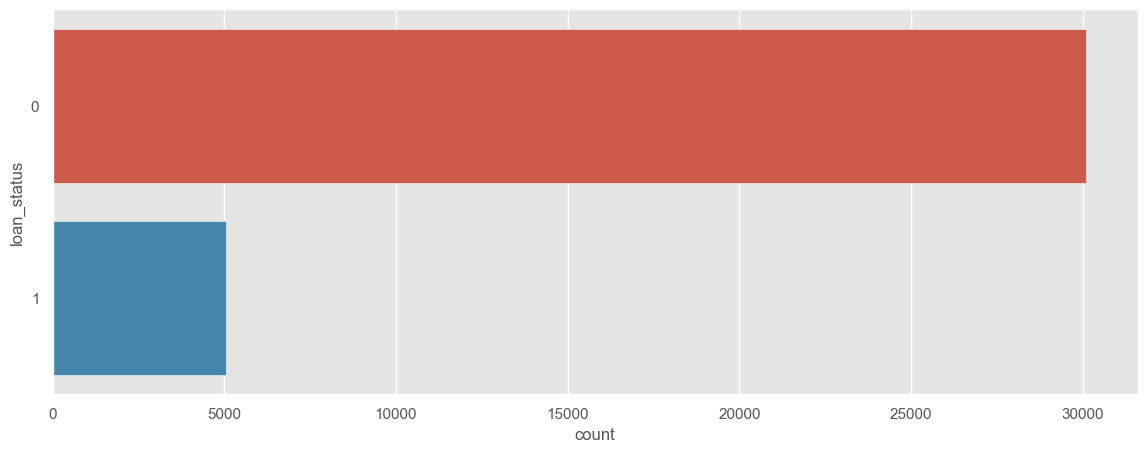

In [12]:
#Visualising Data Insights
# check for amount of defaults in the data using countplot
plt.figure(figsize=(14,5))
sns.countplot(y="loan_status", data=loan)
plt.show()


In [13]:
#Univariate Analysis
# function for plotting the count plot features wrt default ratio
def plotUnivariateRatioBar(feature, data=loan, figsize=(10,5), rsorted=True):
    plt.figure(figsize=figsize)
    if rsorted:
        feature_dimension = sorted(data[feature].unique())
    else:
        feature_dimension = data[feature].unique()
    feature_values = []
    for fd in feature_dimension:
        feature_filter = data[data[feature]==fd]
        feature_count = len(feature_filter[feature_filter["loan_status"]==1])
        feature_values.append(feature_count*100/feature_filter["loan_status"].count())
    plt.bar(feature_dimension, feature_values, color='orange', edgecolor='white')
    plt.title("Loan Defaults wrt "+str(feature)+" feature - countplot")
    plt.xlabel(feature, fontsize=16)
    plt.ylabel("defaulter %", fontsize=16)
    plt.show()
# function to plot univariate with default status scale 0 - 1
def plotUnivariateBar(x, figsize=(10,5)):
    plt.figure(figsize=figsize)
    sns.barplot(x=x, y='loan_status', data=loan)
    plt.title("Loan Defaults wrt "+str(x)+" feature - countplot")
    plt.xlabel(x, fontsize=16)
    plt.ylabel("defaulter ratio", fontsize=16)
    plt.show()


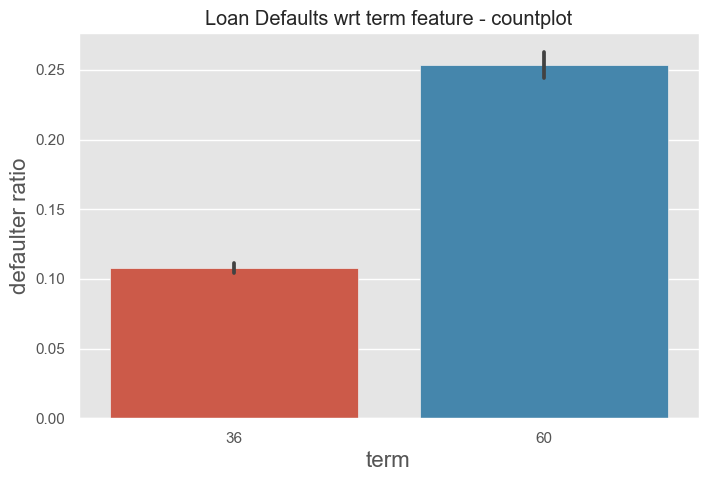

From above plot for ‘term’ we can infer that the defaulters rate is increasing wrt term, hence the chances of loan getting deaulted is less for 36m than 60m.
is term benificial -> Yes



In [14]:
#a. Categorical Features
# check for defaulters wrt term in the data using countplot
plotUnivariateBar("term", figsize=(8,5))
print('''From above plot for ‘term’ we can infer that the defaulters rate is increasing wrt term, hence the chances of loan getting deaulted is less for 36m than 60m.
is term benificial -> Yes
''')

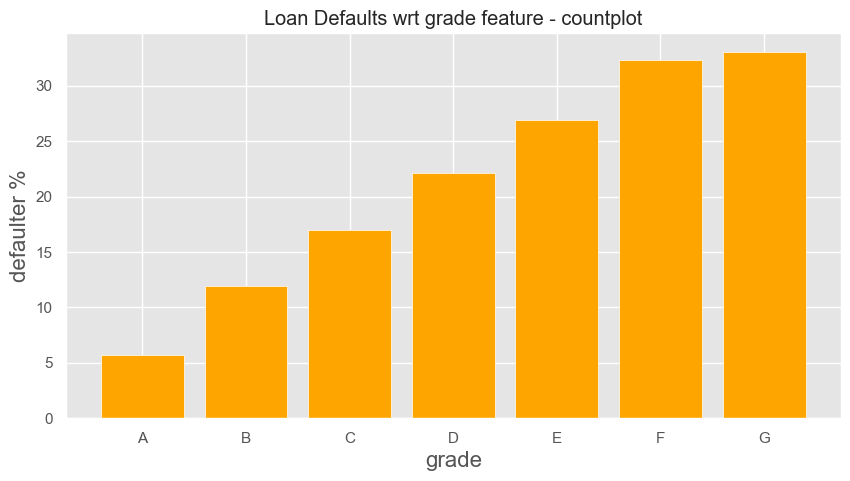

From above plot for ‘grade’ we can infer that the defaulters rate is increasing wrt grade, hence the chances of loan getting deaulted increases with the grade from A moving towards G.
is grade benificial -> Yes



In [15]:
# check for defaulters wrt grade in the data using countplot
plotUnivariateRatioBar("grade")
print('''From above plot for ‘grade’ we can infer that the defaulters rate is increasing wrt grade, hence the chances of loan getting deaulted increases with the grade from A moving towards G.
is grade benificial -> Yes
''')

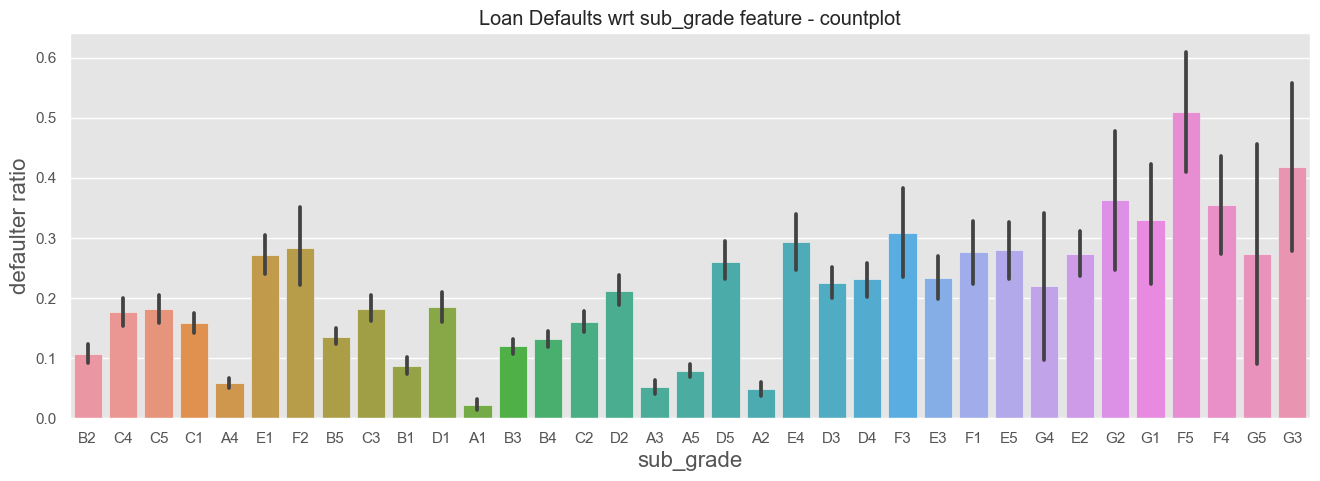

From above plot for ‘sub_grade’ we can infer that the defaulters rate is increasing wrt sub_grade, hence the chances of loan getting deaulted increases with the sub_grade from A1 moving towards G5.
is sub_grade benificial -> Yes



In [16]:
# check for defaulters wrt sub_grade in the data using countplot
plotUnivariateBar("sub_grade", figsize=(16,5))

print('''From above plot for ‘sub_grade’ we can infer that the defaulters rate is increasing wrt sub_grade, hence the chances of loan getting deaulted increases with the sub_grade from A1 moving towards G5.
is sub_grade benificial -> Yes
''')

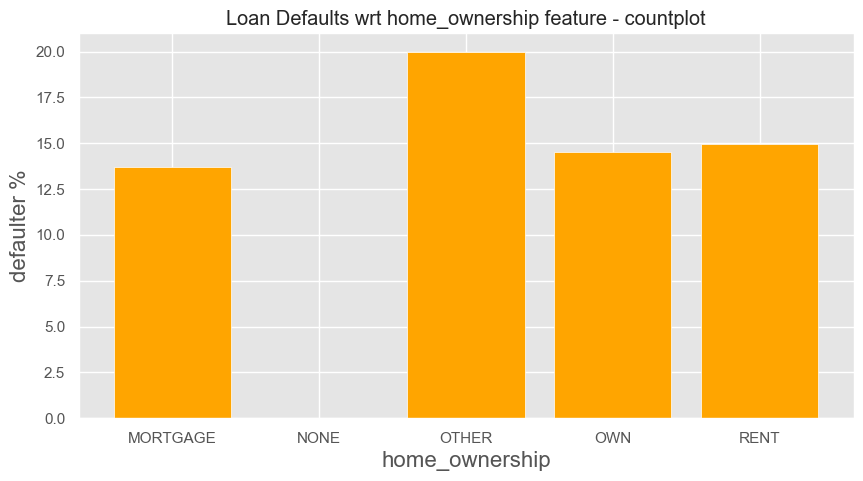

From above plot for ‘home_ownership’ we can infer that the defaulters rate is constant here (it is quite more for OTHERS but we dont know what is in there, so we’ll not consider it for analysis), hence defaulter does not depends on home_ownership
is home_ownership benificial -> No



In [17]:
# check for defaulters wrt home_ownership in the data 

plotUnivariateRatioBar("home_ownership")

print('''From above plot for ‘home_ownership’ we can infer that the defaulters rate is constant here (it is quite more for OTHERS but we dont know what is in there, so we’ll not consider it for analysis), hence defaulter does not depends on home_ownership
is home_ownership benificial -> No
''')

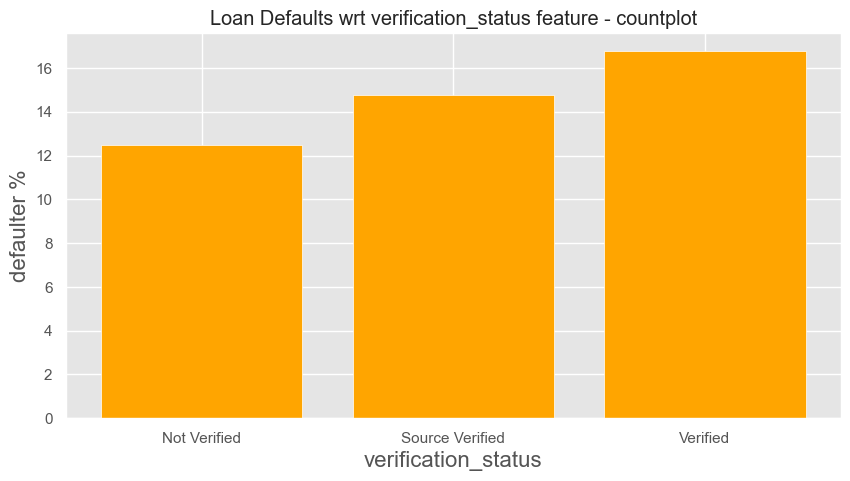

From above plot for ‘verification_status’ we can infer that the defaulters rate is increasing and is less for Not Verified users than Verified ones, but not useful for analysis.
is verification_status benificial -> No



In [18]:
# check for defaulters wrt verification_status in the data
plotUnivariateRatioBar("verification_status")
print('''From above plot for ‘verification_status’ we can infer that the defaulters rate is increasing and is less for Not Verified users than Verified ones, but not useful for analysis.
is verification_status benificial -> No
''')

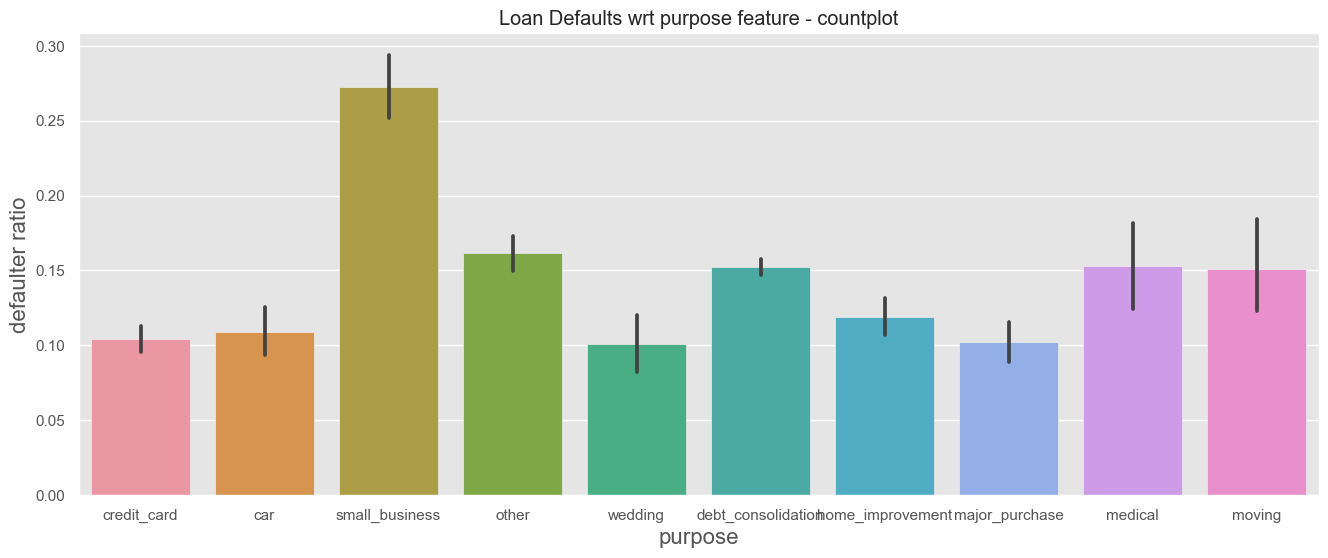

From above plot for ‘purpose’ we can infer that the defaulters rate is nearly constant for all purpose type except ‘small business’, hence rate will depend on purpose of the loan
is purpose benificial -> Yes



In [19]:
# check for defaulters wrt purpose in the data using countplot
plotUnivariateBar("purpose", figsize=(16,6))
print('''From above plot for ‘purpose’ we can infer that the defaulters rate is nearly constant for all purpose type except ‘small business’, hence rate will depend on purpose of the loan
is purpose benificial -> Yes
''')

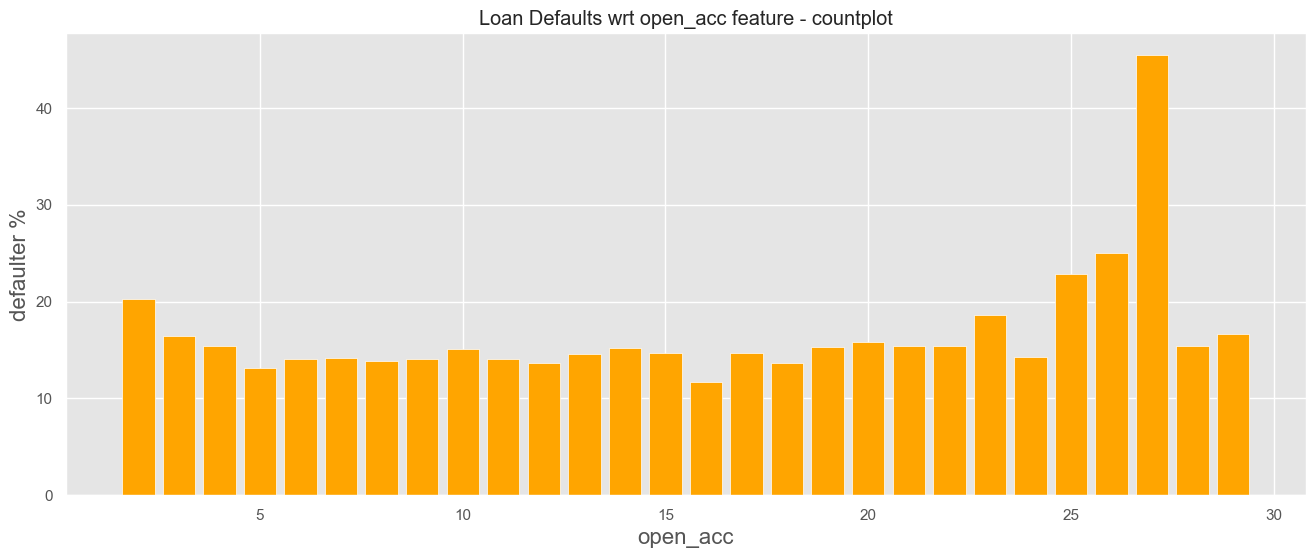

From above plot for ‘open_acc’ we can infer that the defaulters rate is nearly constant for feature open_acc, hence rate will not depend on open_acc feature
is open_acc benificial -> No



In [20]:
# check for defaulters wrt open_acc in the data using countplot
plotUnivariateRatioBar("open_acc", figsize=(16,6))
print('''From above plot for ‘open_acc’ we can infer that the defaulters rate is nearly constant for feature open_acc, hence rate will not depend on open_acc feature
is open_acc benificial -> No
''')

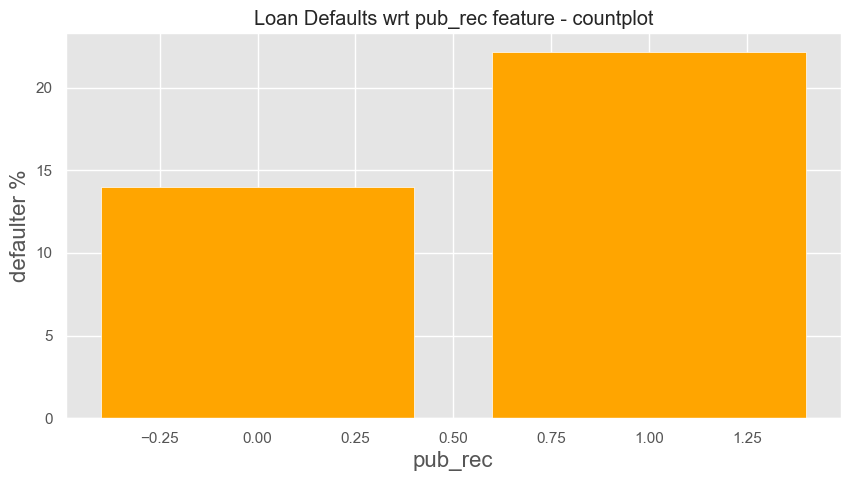

From above plot for ‘pub_rec’ we can infer that the defaulters rate is nearly increasing as it is less for 0 and more for pub_rec with value 1, but as other values are very less as compared to 0 we’ll not consider this
is pub_rec benificial -> No




In [21]:
# check for defaulters wrt pub_rec in the data using countplot
plotUnivariateRatioBar("pub_rec")
print('''From above plot for ‘pub_rec’ we can infer that the defaulters rate is nearly increasing as it is less for 0 and more for pub_rec with value 1, but as other values are very less as compared to 0 we’ll not consider this
is pub_rec benificial -> No

''')

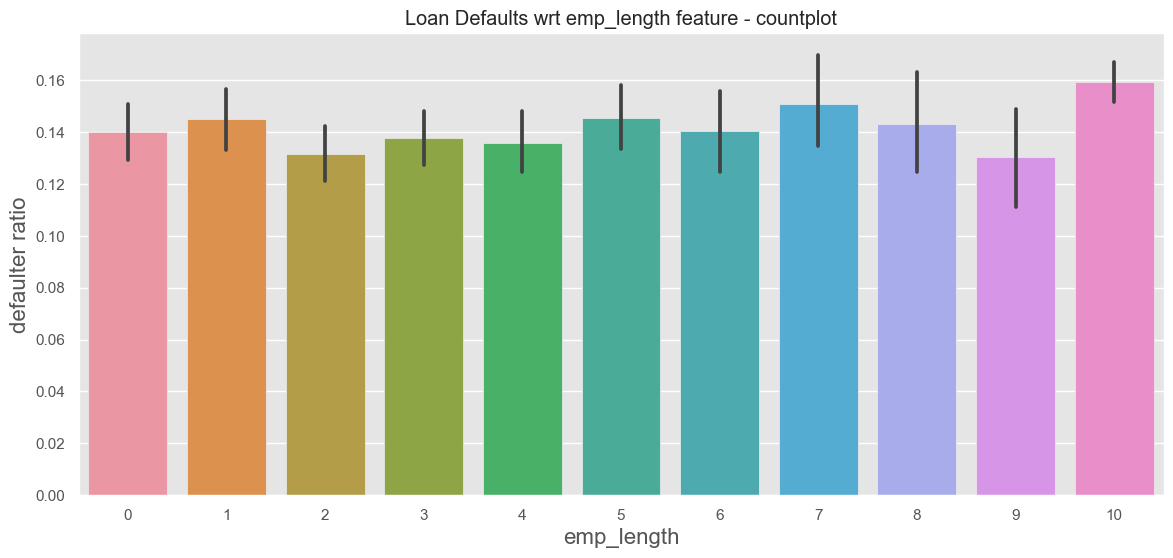

From above plot for ‘emp_length’ we can infer that the defaulters rate is constant here, hence defaulter does not depends on emp_length
is emp_length benificial -> No



In [22]:
# b. Continuous Features

# check for defaulters wrt emp_length in the data using countplot
plotUnivariateBar("emp_length", figsize=(14,6))

print('''From above plot for ‘emp_length’ we can infer that the defaulters rate is constant here, hence defaulter does not depends on emp_length
is emp_length benificial -> No
''')

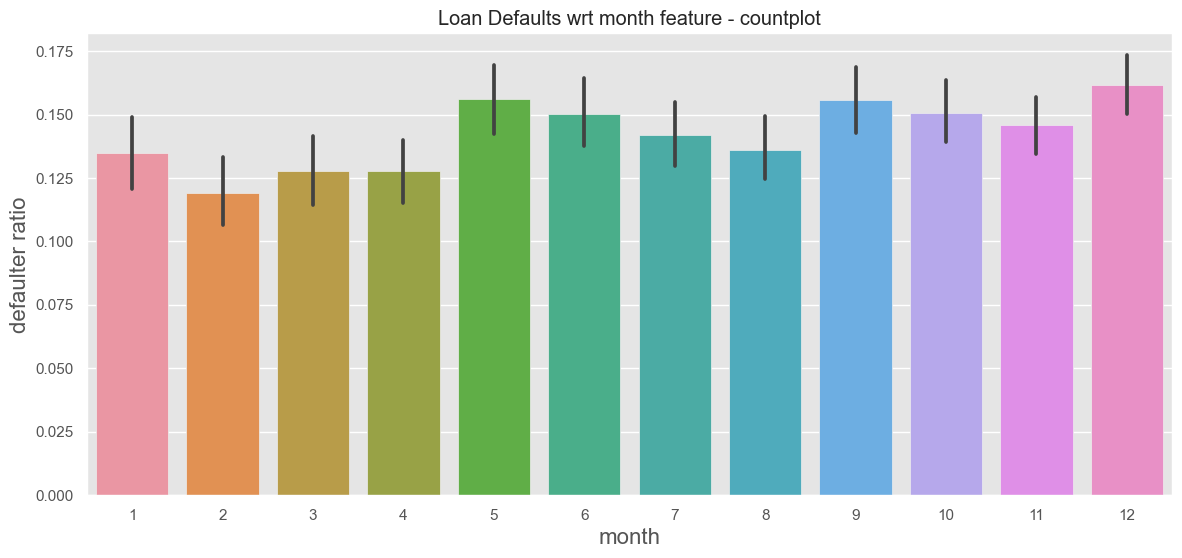

From above plot for ‘month’ we can infer that the defaulters rate is nearly constant here, not useful
is month benificial -> No



In [23]:
# check for defaulters wrt month in the data using countplot
plotUnivariateBar("month", figsize=(14,6))
print('''From above plot for ‘month’ we can infer that the defaulters rate is nearly constant here, not useful
is month benificial -> No
''')

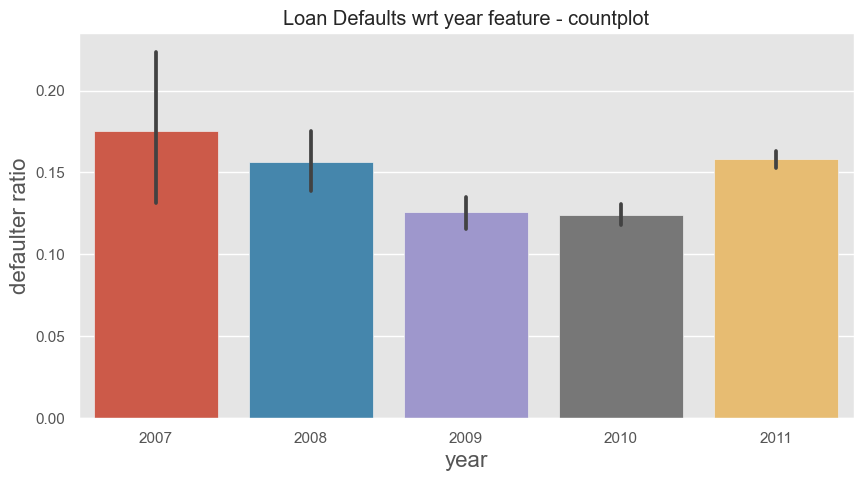

From above plot for ‘year’ we can infer that the defaulters rate is nearly constant here, not useful
is year benificial -> No



In [24]:
# check for defaulters wrt year in the data using countplot
plotUnivariateBar("year")
print('''From above plot for ‘year’ we can infer that the defaulters rate is nearly constant here, not useful
is year benificial -> No
''')

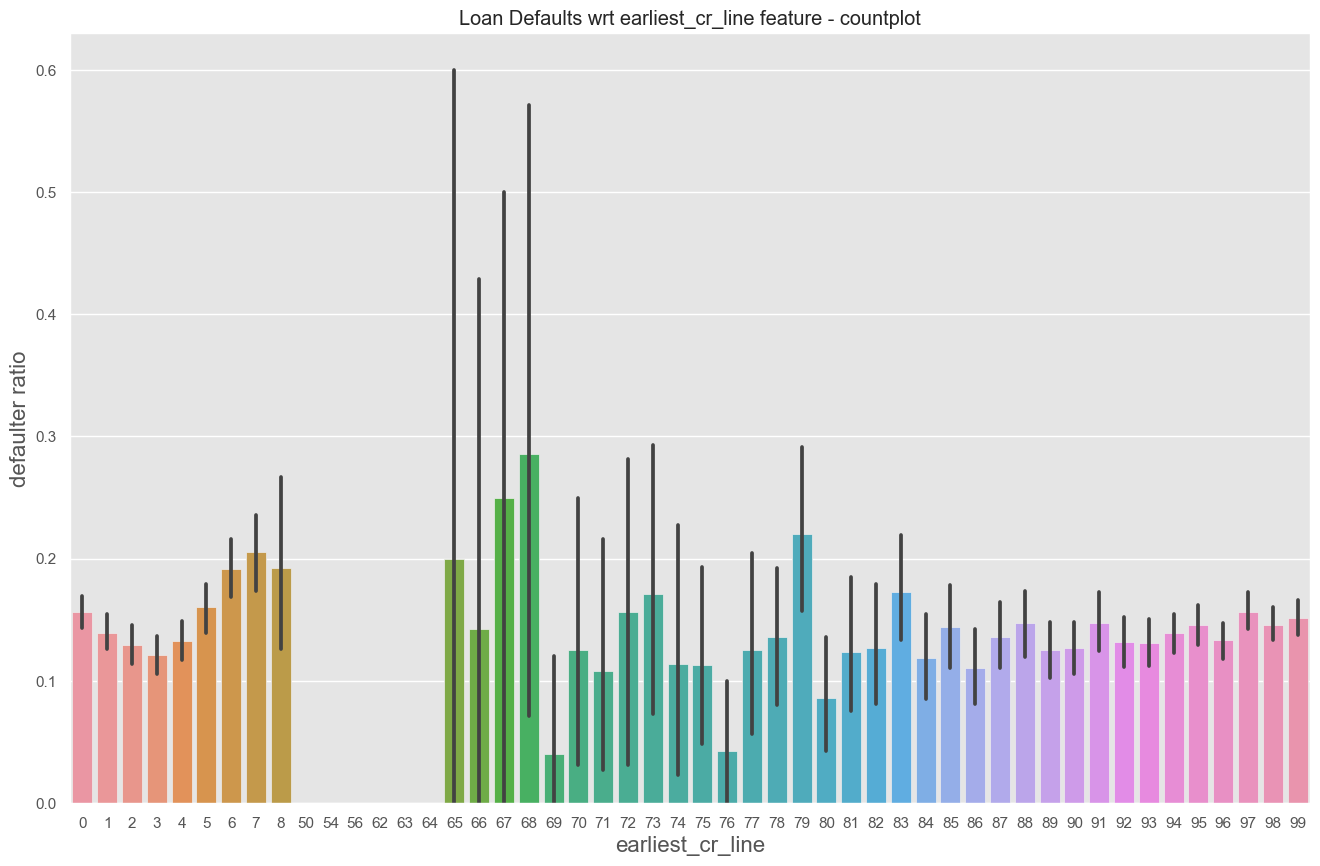

From above plot for ‘earliest_cr_line’ we can infer that the defaulters rate is nearly constant for all purpose type except year around 65, hence rate does not depends on earliest_cr_line of the person
is earliest_cr_line benificial -> No



In [25]:
# check for defaulters wrt earliest_cr_line in the data
plotUnivariateBar("earliest_cr_line", figsize=(16,10))
print('''From above plot for ‘earliest_cr_line’ we can infer that the defaulters rate is nearly constant for all purpose type except year around 65, hence rate does not depends on earliest_cr_line of the person
is earliest_cr_line benificial -> No
''')

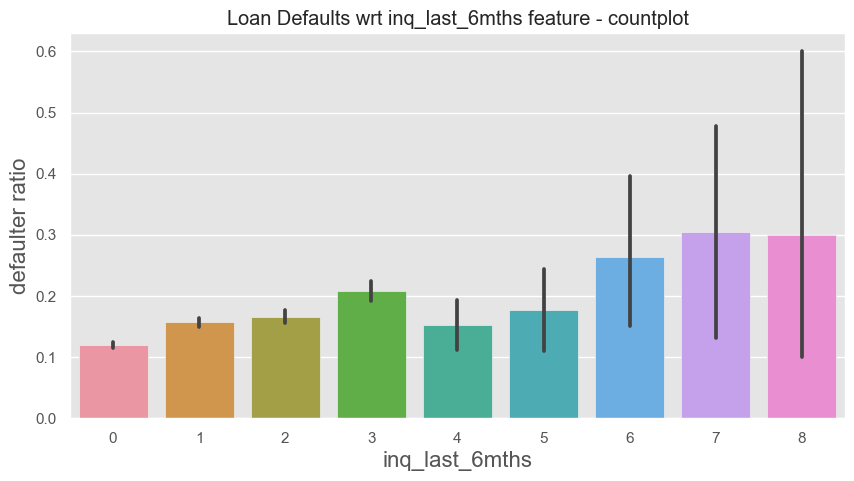

From above plot for ‘inq_last_6mths’ we can infer that the defaulters rate is not consistently increasing with inq_last_6mths type, hence not useful
is inq_last_6mths benificial -> No



In [26]:
# check for defaulters wrt inq_last_6mths in the data
plotUnivariateBar("inq_last_6mths")
print('''From above plot for ‘inq_last_6mths’ we can infer that the defaulters rate is not consistently increasing with inq_last_6mths type, hence not useful
is inq_last_6mths benificial -> No
''')

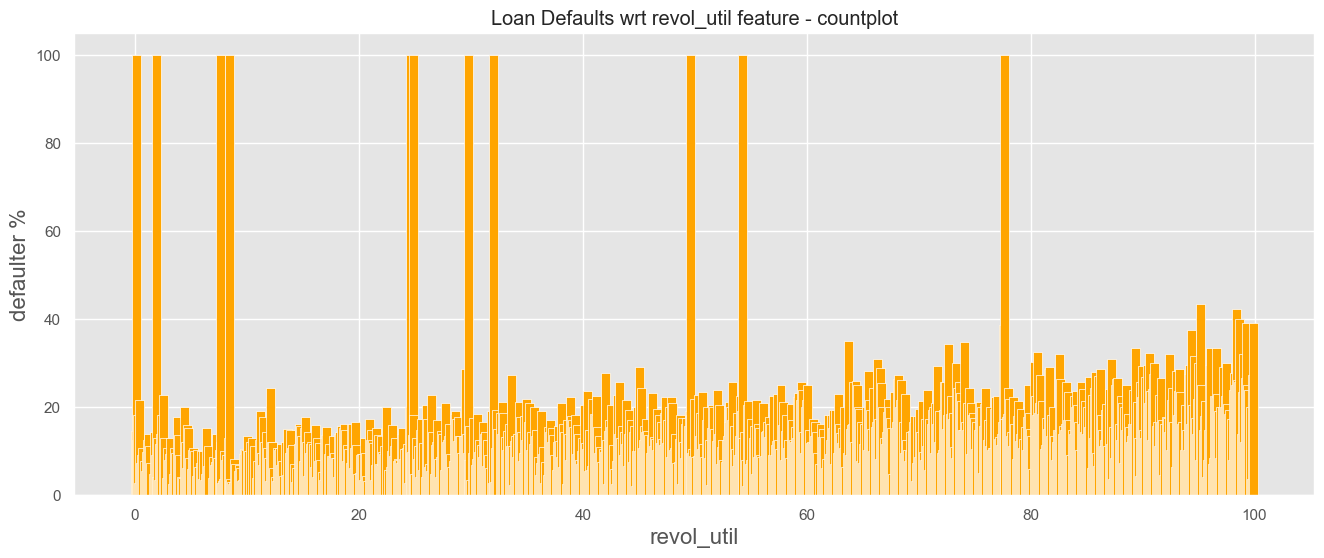

From above plot for ‘revol_util’ we can infer that the defaulters rate is fluctuating where some have complete 100% ratio for defaulter and is increasing as the magnitude increases, hence rate will depend on revol_util feature
is revol_util benificial -> Yes



In [27]:
# check for defaulters wrt revol_util in the data using countplot
plotUnivariateRatioBar("revol_util", figsize=(16,6))
print('''From above plot for ‘revol_util’ we can infer that the defaulters rate is fluctuating where some have complete 100% ratio for defaulter and is increasing as the magnitude increases, hence rate will depend on revol_util feature
is revol_util benificial -> Yes
''')

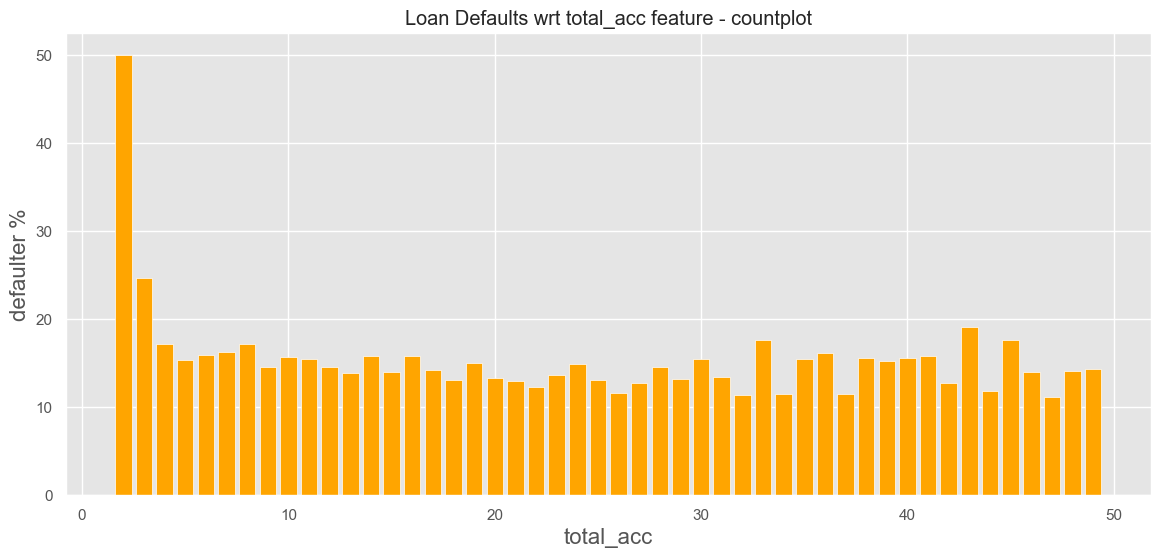

From above plot for ‘total_acc’ we can infer that the defaulters rate is nearly constant for all total_acc values, hence rate will not depend on total_acc feature
is total_acc benificial -> No



In [28]:
# check for defaulters wrt total_acc in the data using countplot
plotUnivariateRatioBar("total_acc", figsize=(14,6))
print('''From above plot for ‘total_acc’ we can infer that the defaulters rate is nearly constant for all total_acc values, hence rate will not depend on total_acc feature
is total_acc benificial -> No
''')

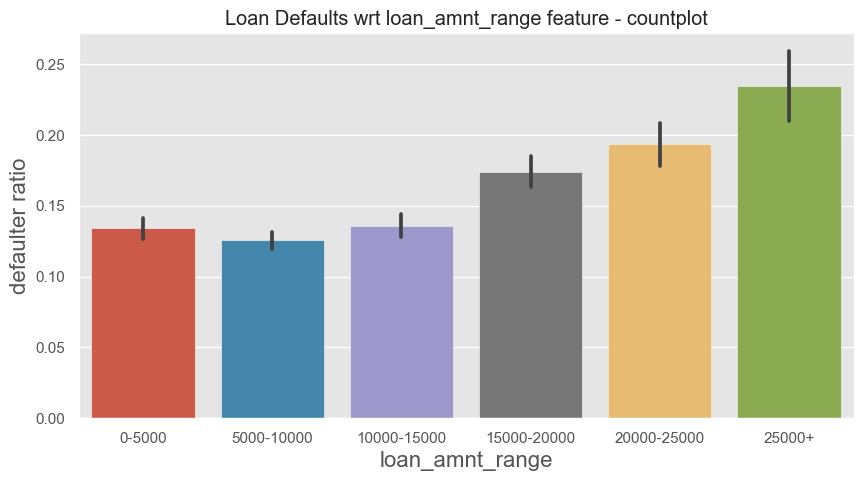

From above plot for ‘loan_amnt_range’ we can infer that the defaulters rate is increasing loan_amnt_range values, hence rate will depend on loan_amnt_range feature
is loan_amnt_range benificial -> Yes



In [29]:
# check for defaulters wrt loan_amnt_range in the data using countplot
plotUnivariateBar("loan_amnt_range")
print('''From above plot for ‘loan_amnt_range’ we can infer that the defaulters rate is increasing loan_amnt_range values, hence rate will depend on loan_amnt_range feature
is loan_amnt_range benificial -> Yes
''')

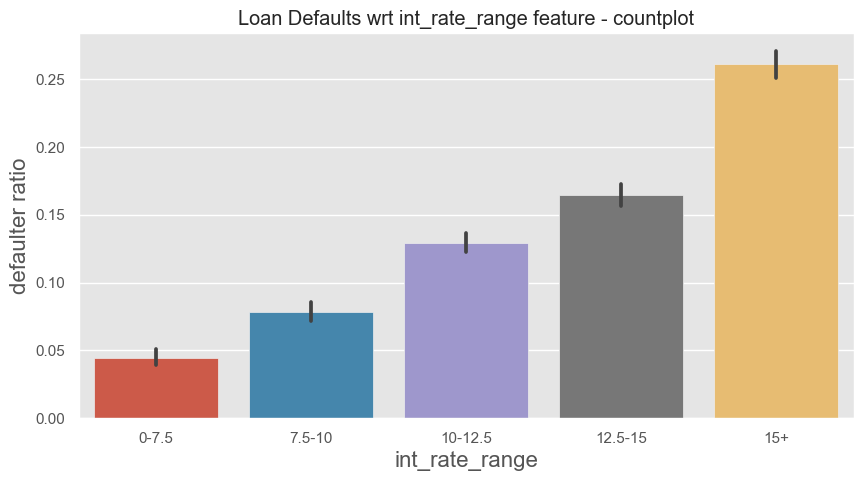

From above plot for ‘int_rate_range’ we can infer that the defaulters rate is decreasing with int_rate_range values, hence rate will depend on int_rate_range feature
is int_rate_range benificial -> Yes



In [30]:
# check for defaulters wrt int_rate_range in the data
plotUnivariateBar("int_rate_range")
print('''From above plot for ‘int_rate_range’ we can infer that the defaulters rate is decreasing with int_rate_range values, hence rate will depend on int_rate_range feature
is int_rate_range benificial -> Yes
''')

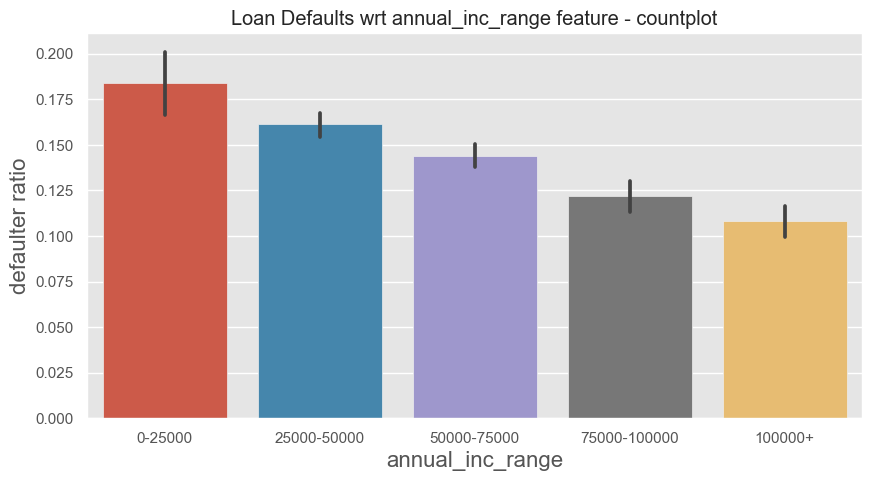

From above plot for ‘annual_inc_range’ we can infer that the defaulters rate is decreasing as with annual_inc_range values, hence rate will depend on annual_inc_range feature
is annual_inc_range benificial -> Yes



In [31]:
# check for defaulters wrt annual_inc_range in the data
plotUnivariateBar("annual_inc_range")
print('''From above plot for ‘annual_inc_range’ we can infer that the defaulters rate is decreasing as with annual_inc_range values, hence rate will depend on annual_inc_range feature
is annual_inc_range benificial -> Yes
''')

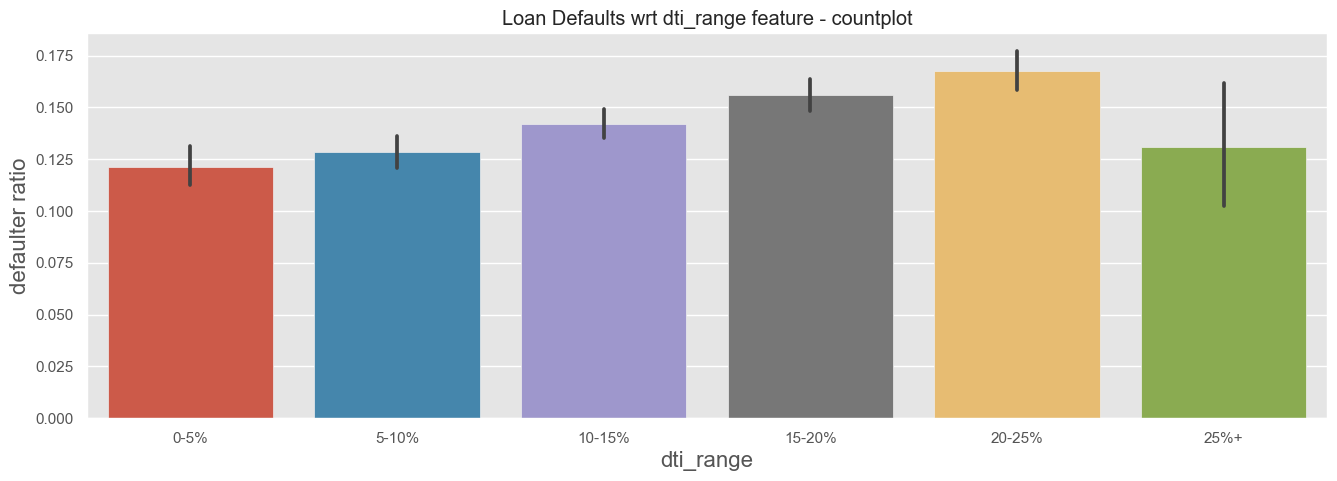

From above plot for ‘dti_range’ we can infer that the defaulters rate is increasing as with dti_range values, hence rate will depend on dti_range feature
is dti_range benificial -> Yes



In [32]:
# check for defaulters wrt dti_range in the data using countplot
plotUnivariateBar("dti_range", figsize=(16,5))
print('''From above plot for ‘dti_range’ we can infer that the defaulters rate is increasing as with dti_range values, hence rate will depend on dti_range feature
is dti_range benificial -> Yes
''')

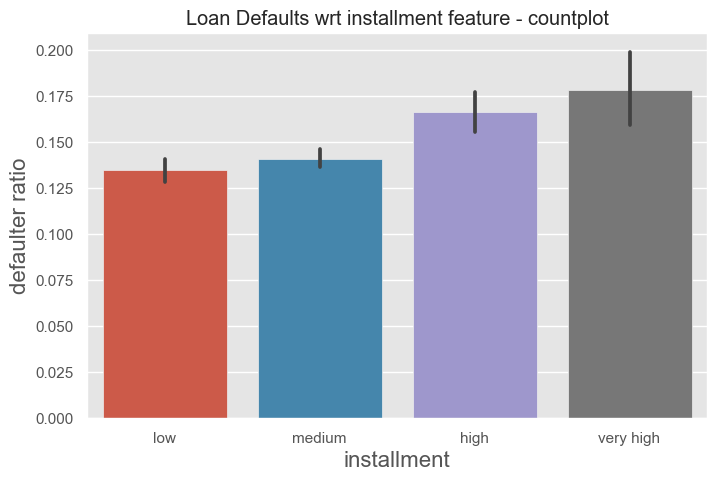

From above plot for ‘installment’ we can infer that the defaulters rate is increasing as with installment values, hence rate will depend on dti_range feature
is installment benificial -> Yes



In [33]:
# check for defaulters wrt installment range in the data
plotUnivariateBar("installment", figsize=(8,5))
print('''From above plot for ‘installment’ we can infer that the defaulters rate is increasing as with installment values, hence rate will depend on dti_range feature
is installment benificial -> Yes
''')

In [34]:
#Therefore, following are the important feature we deduced from above 
#Univariate analysis:
    
#term, grade, purpose, pub_rec, revol_util, funded_amnt_inv, int_rate, 
#annual_inc, dti, installment


In [35]:
#Bivariate Analysis

# function to plot scatter plot for two features
def plotScatter(x, y):
    plt.figure(figsize=(16,6))
    sns.scatterplot(x=x, y=y, hue="loan_status", data=loan)
    plt.title("Scatter plot between "+x+" and "+y)
    plt.xlabel(x, fontsize=16)
    plt.ylabel(y, fontsize=16)
    plt.show()
    
def plotBivariateBar(x, hue, figsize=(16,6)):
    plt.figure(figsize=figsize)
    sns.barplot(x=x, y='loan_status', hue=hue, data=loan)
    plt.title("Loan Default ratio wrt "+x+" feature for hue "+hue+" in the data using countplot")
    plt.xlabel(x, fontsize=16)
    plt.ylabel("defaulter ratio", fontsize=16)
    plt.show()

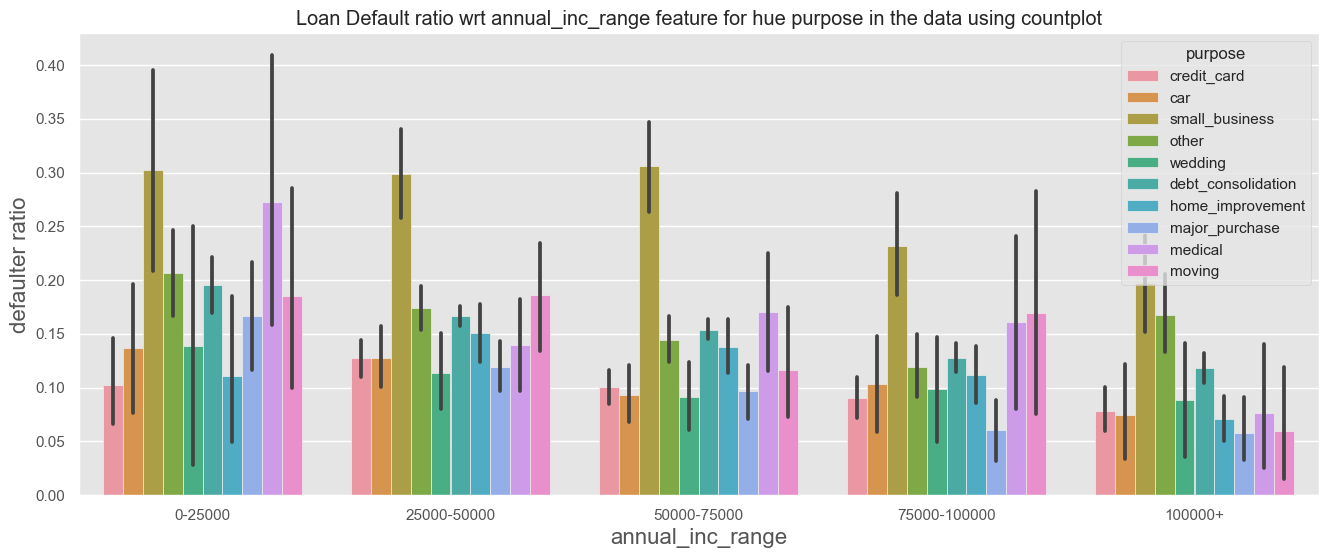

From above plot, we can infer it doesn’t shows any correlation
related - N



In [36]:
#Plotting for two different features with respect to loan default ratio on y-axis with Bar Plots and Scatter Plots.
# check for defaulters wrt annual_inc and purpose in the data using countplot
plotBivariateBar("annual_inc_range", "purpose")
print('''From above plot, we can infer it doesn’t shows any correlation
related - N
''')

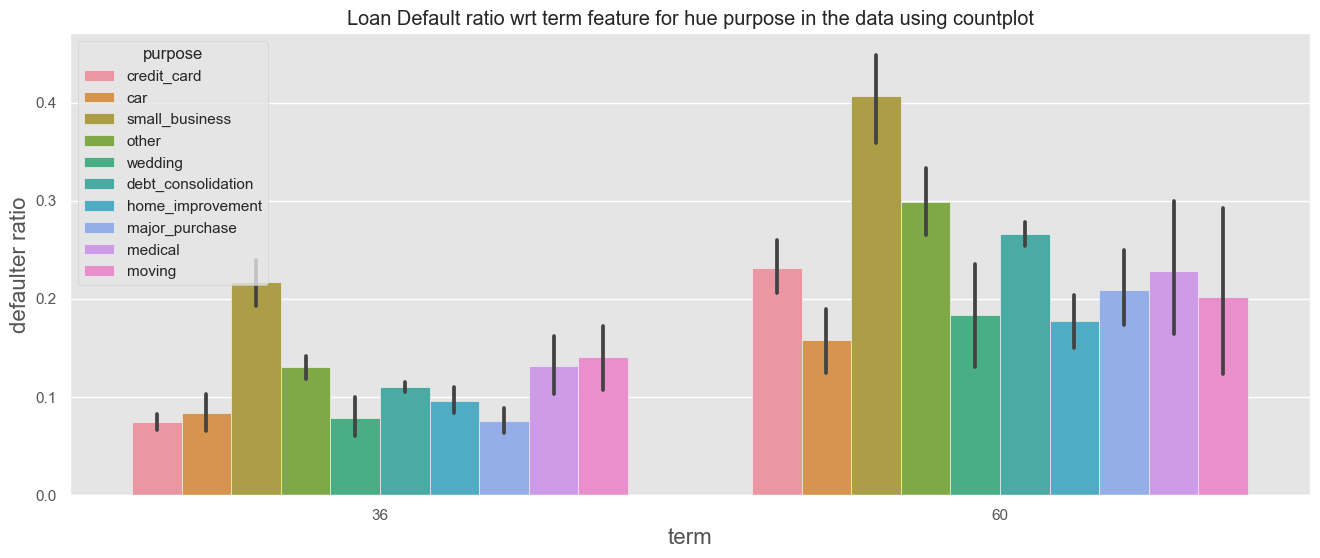

As we can see straight lines on the plot, default ratio increases for every purpose wrt term
related - Y



In [37]:
# check for defaulters wrt term and purpose in the data 
plotBivariateBar("term", "purpose")
print('''As we can see straight lines on the plot, default ratio increases for every purpose wrt term
related - Y
''')

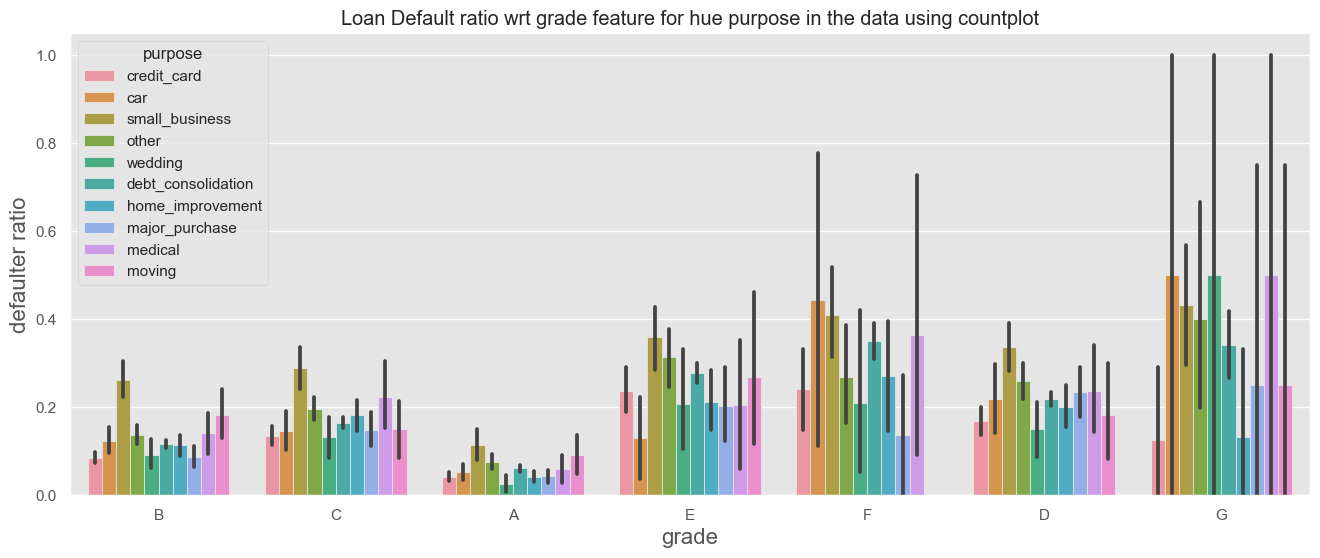

As we can see straight lines on the plot, default ratio increases for every purpose wrt grade
related - Y



In [38]:
# check for defaulters wrt grade and purpose in the data 
plotBivariateBar("grade", "purpose")
print('''As we can see straight lines on the plot, default ratio increases for every purpose wrt grade
related - Y
''')

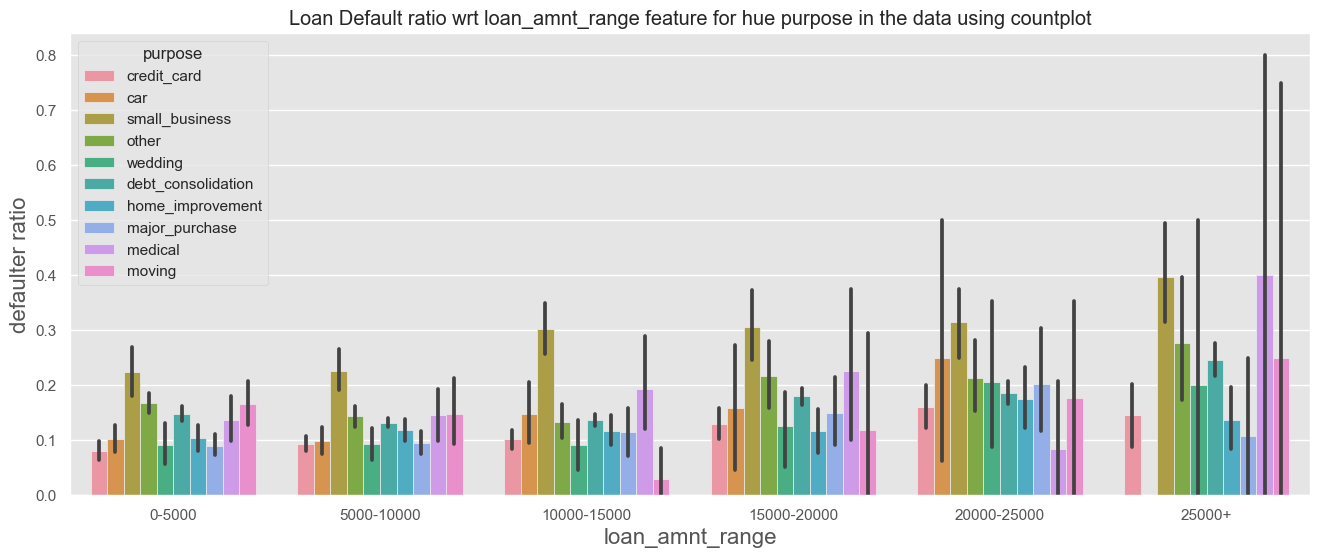

As we can see straight lines on the plot, default ratio increases for every purpose wrt loan_amnt_range
related - Y



In [39]:
# check for defaulters wrt loan_amnt_range and purpose in the data
plotBivariateBar("loan_amnt_range", "purpose")
print('''As we can see straight lines on the plot, default ratio increases for every purpose wrt loan_amnt_range
related - Y
''')

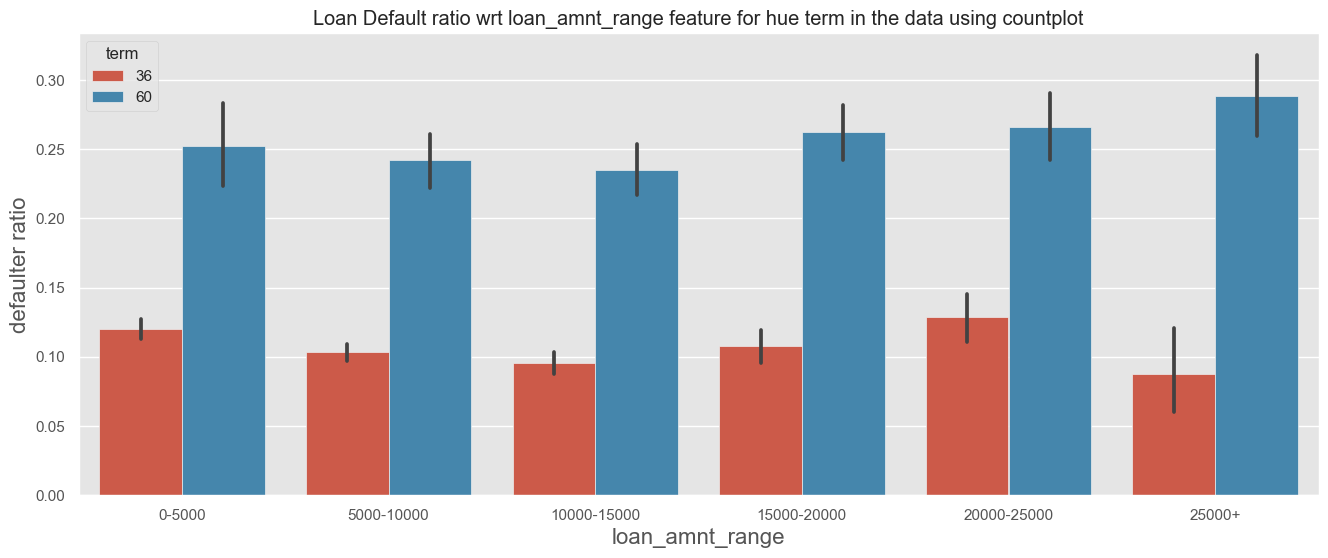

As we can see straight lines on the plot, default ratio increases for every term wrt loan_amnt_range
related - Y



In [40]:
# check for defaulters wrt loan_amnt_range and term in the data
plotBivariateBar("loan_amnt_range", "term")
print('''As we can see straight lines on the plot, default ratio increases for every term wrt loan_amnt_range
related - Y
''')

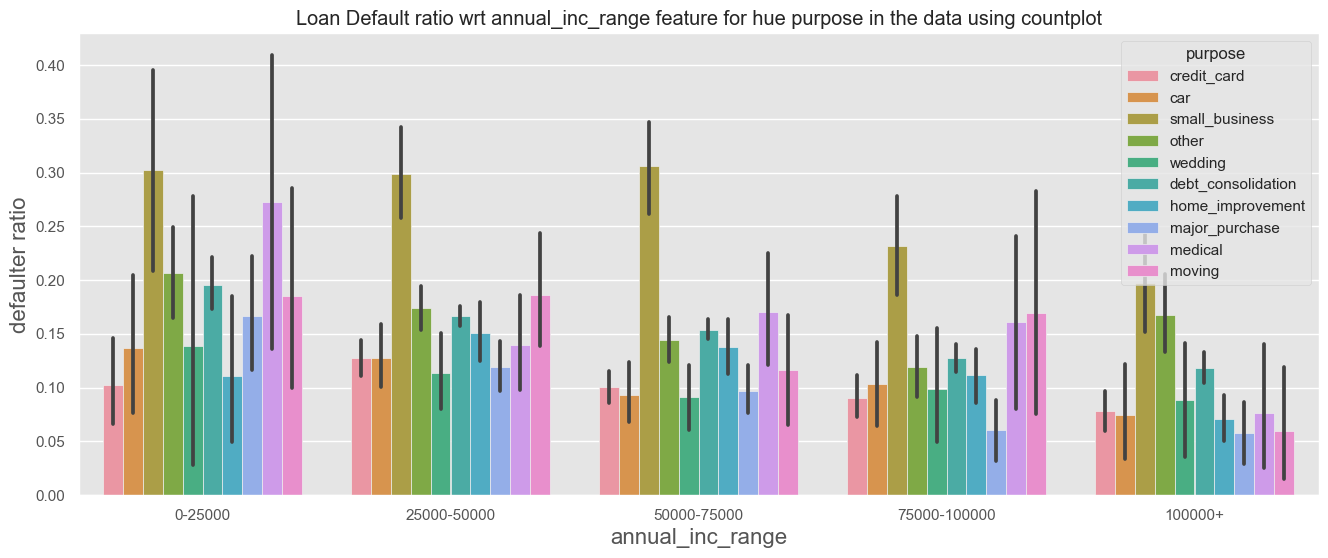

As we can see straight lines on the plot, default ratio increases for every purpose wrt annual_inc_range
related - Y



In [41]:
# check for defaulters wrt annual_inc_range and purpose in the data
plotBivariateBar("annual_inc_range", "purpose")
print('''As we can see straight lines on the plot, default ratio increases for every purpose wrt annual_inc_range
related - Y
''')

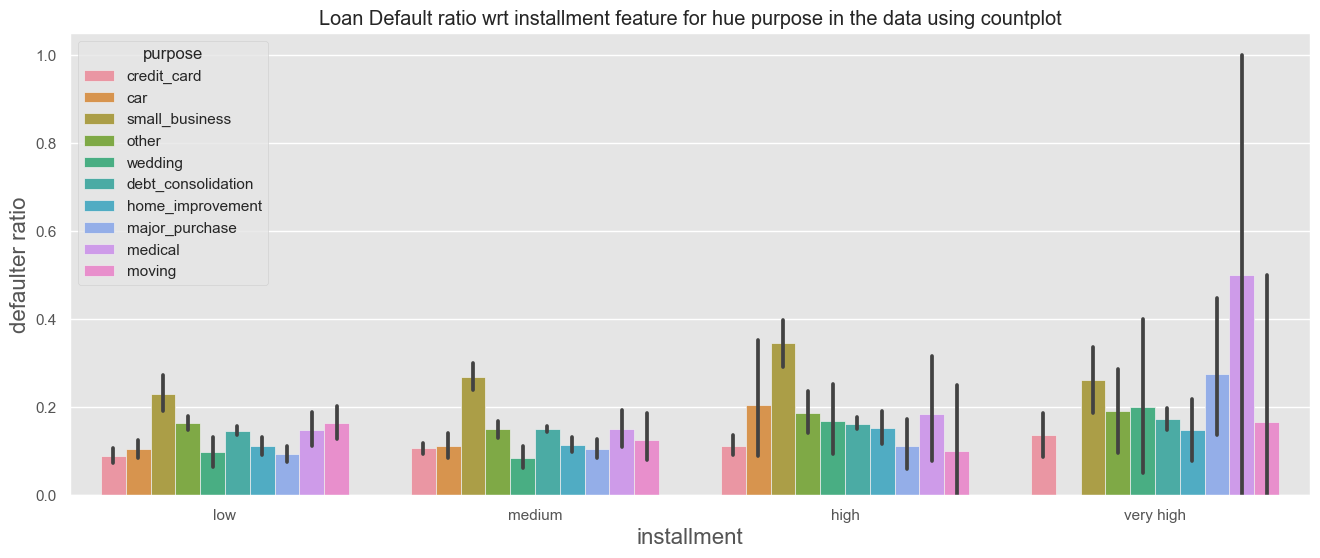

As we can see straight lines on the plot, default ratio increases for every purpose wrt installment except for small_business
related - Y



In [42]:
# check for defaulters wrt annual_inc_range and purpose in the data
plotBivariateBar("installment", "purpose")
print('''As we can see straight lines on the plot, default ratio increases for every purpose wrt installment except for small_business
related - Y
''')

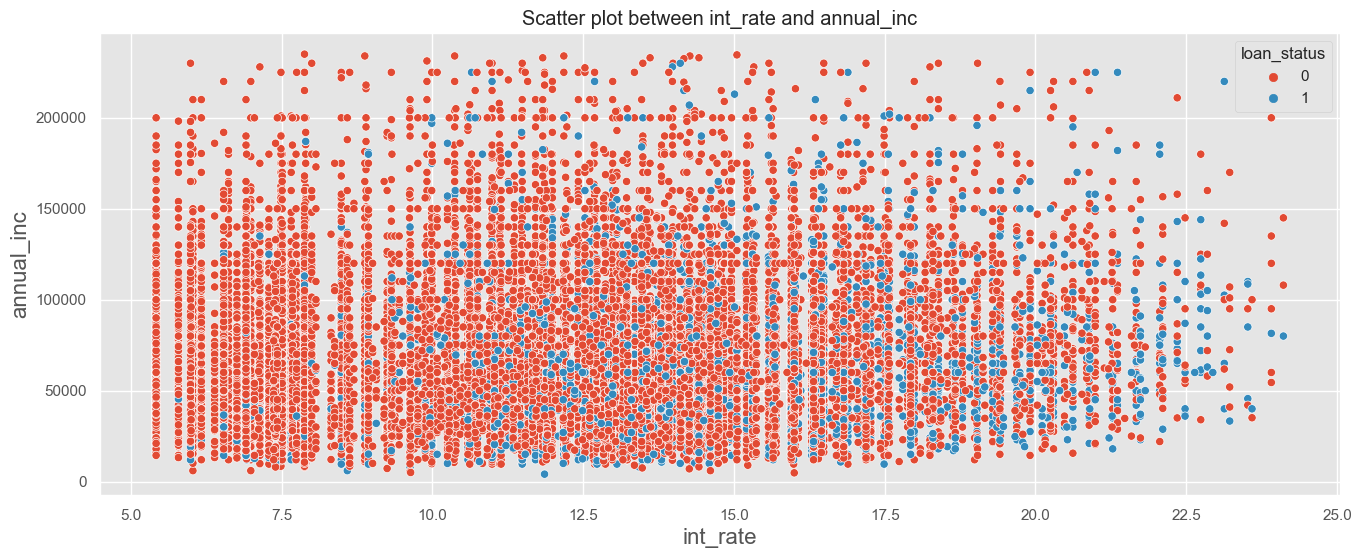

As we can see straight lines on the plot, there is no relation between above mentioned features
related - N



In [43]:
# check for defaulters wrt loan_amnt_range in the data
plotScatter("int_rate", "annual_inc")
print('''As we can see straight lines on the plot, there is no relation between above mentioned features
related - N
''')

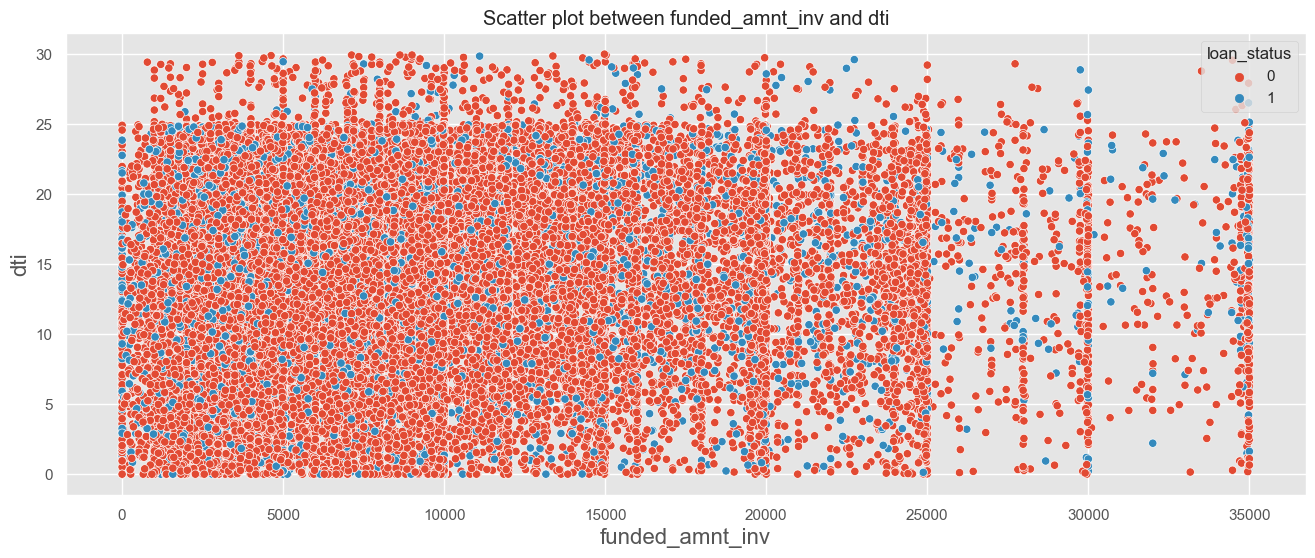

As we can see straight lines on the plot, there is no relation between above mentioned features
related - N



In [44]:
# plot scatter for funded_amnt_inv with dti
plotScatter("funded_amnt_inv", "dti")
print('''As we can see straight lines on the plot, there is no relation between above mentioned features
related - N
''')

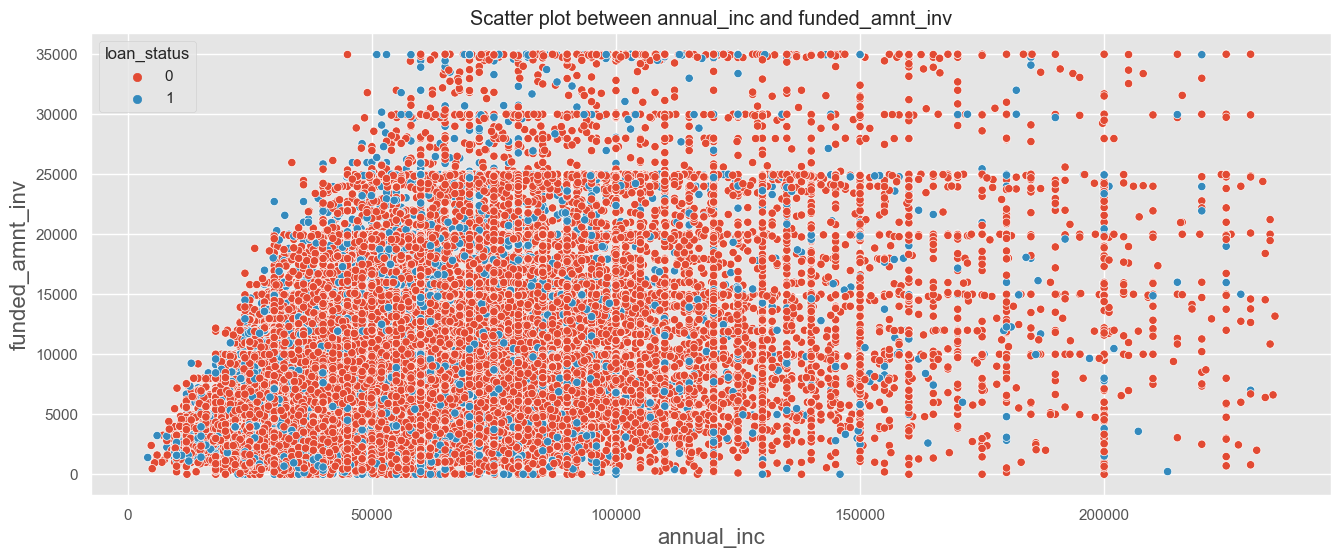

As we can see slope pattern on the plot, there is positive relation between above mentioned features
related - Y



In [45]:
# plot scatter for funded_amnt_inv with annual_inc
plotScatter("annual_inc", "funded_amnt_inv")
print('''As we can see slope pattern on the plot, there is positive relation between above mentioned features
related - Y
''')

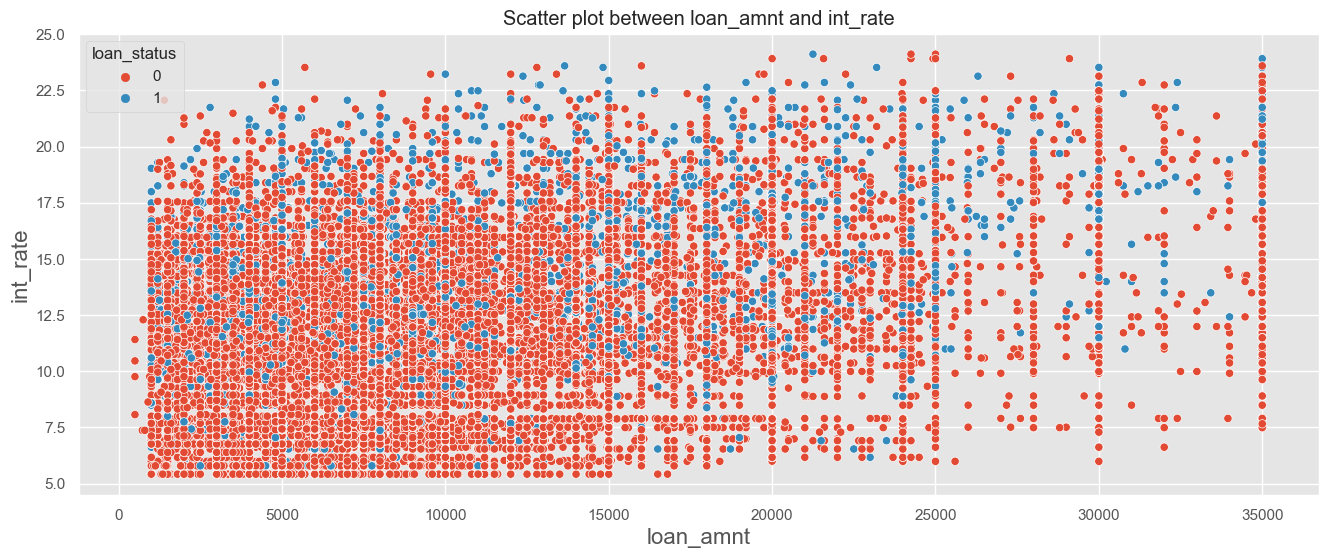

As we can see straight line patterns on the plot, there is no relation between above mentioned features
related - N



In [46]:
# plot scatter for loan_amnt with int_rate
plotScatter("loan_amnt", "int_rate")
print('''As we can see straight line patterns on the plot, there is no relation between above mentioned features
related - N
''')

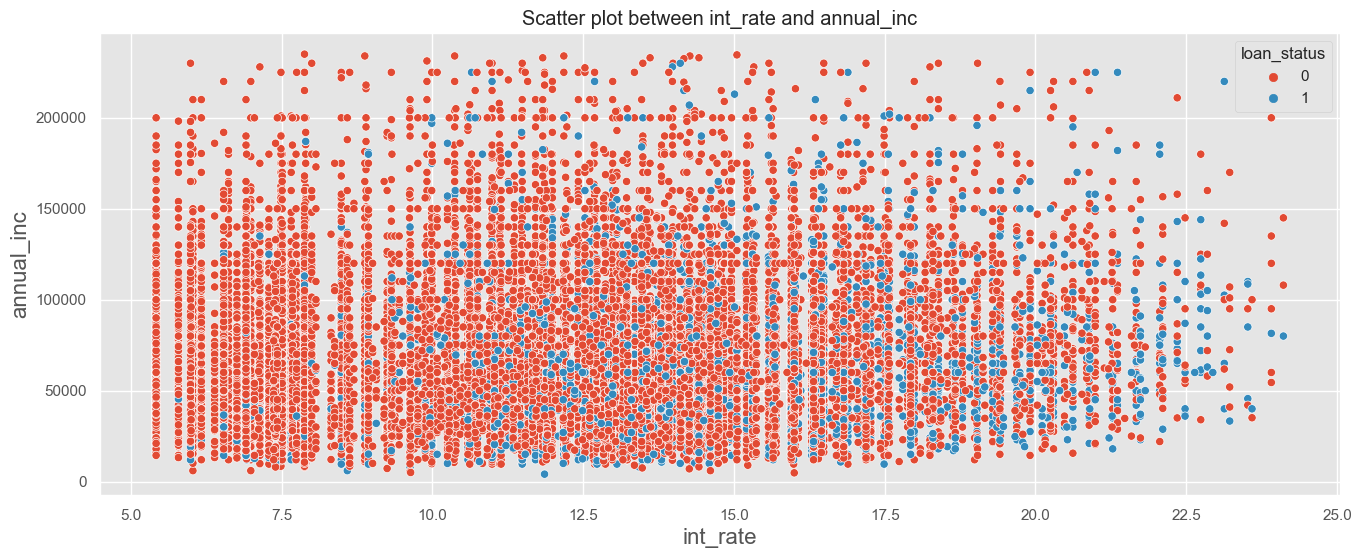

As we can see negative correlation pattern with reduced density on the plot, there is some relation between above mentioned features
related - Y



In [47]:
# plot scatter for int_rate with annual_inc
plotScatter("int_rate", "annual_inc")
print('''As we can see negative correlation pattern with reduced density on the plot, there is some relation between above mentioned features
related - Y
''')

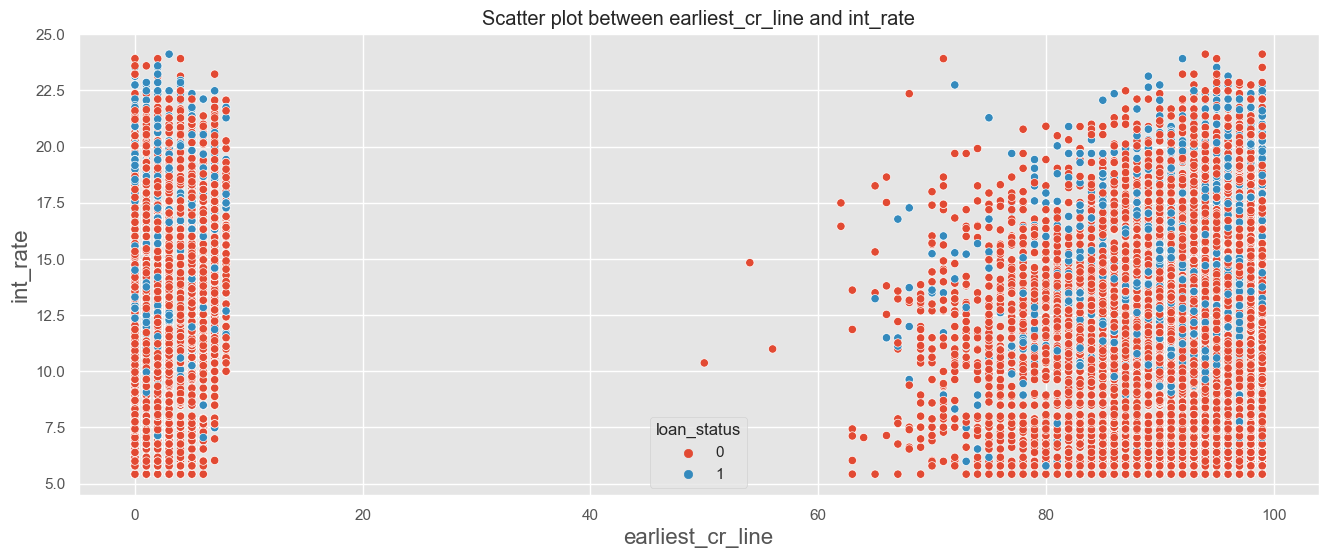

As we can see positive correlation pattern with increasing density on the plot, there is co-relation between above mentioned features
related - Y



In [48]:
# plot scatter for earliest_cr_line with int_rate
plotScatter("earliest_cr_line", "int_rate")
print('''As we can see positive correlation pattern with increasing density on the plot, there is co-relation between above mentioned features
related - Y
''')

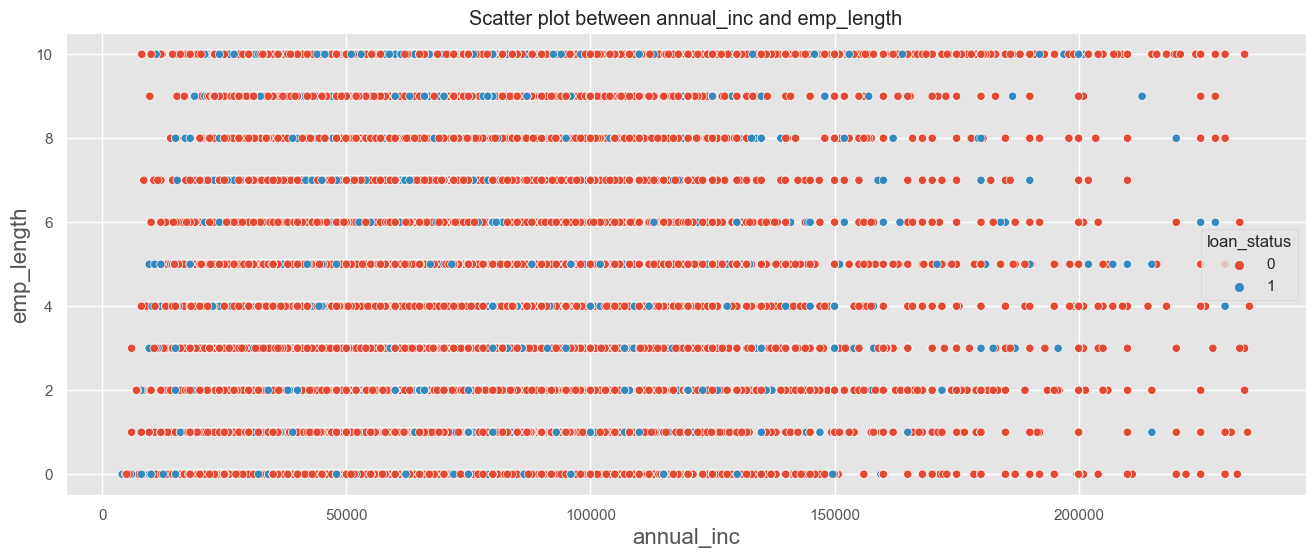

As we can see straight line patterns on the plot, there is no relation between above mentioned features
related - N



In [49]:
# plot scatter for annual_inc with emp_length
plotScatter("annual_inc", "emp_length")
print('''As we can see straight line patterns on the plot, there is no relation between above mentioned features
related - N
''')

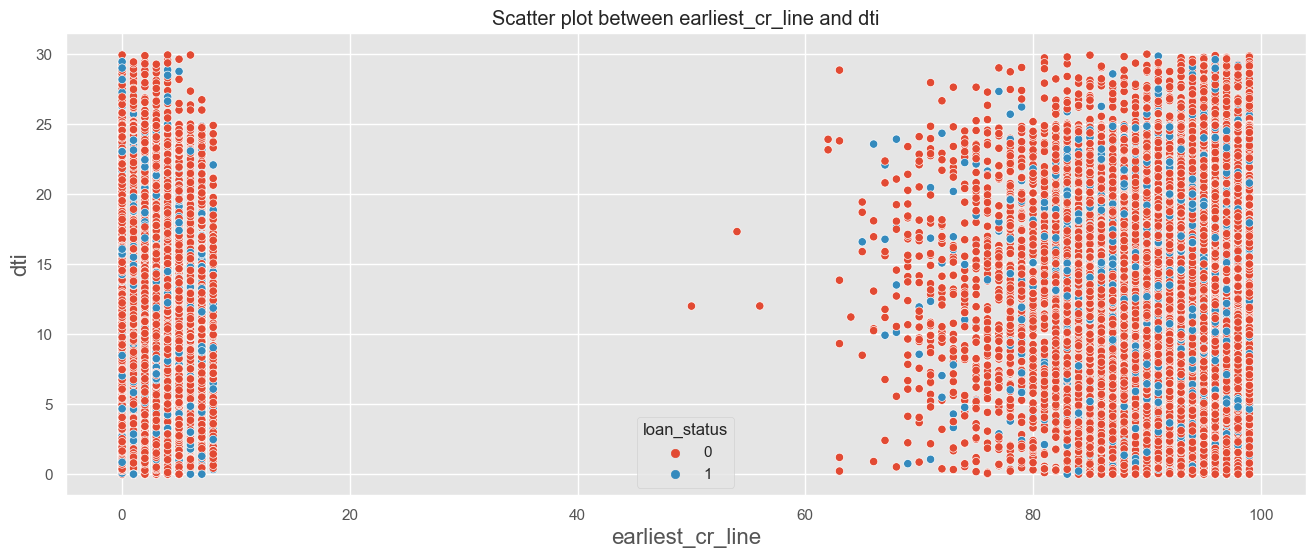

In [50]:
# plot scatter for earliest_cr_line with dti
plotScatter("earliest_cr_line", "dti")


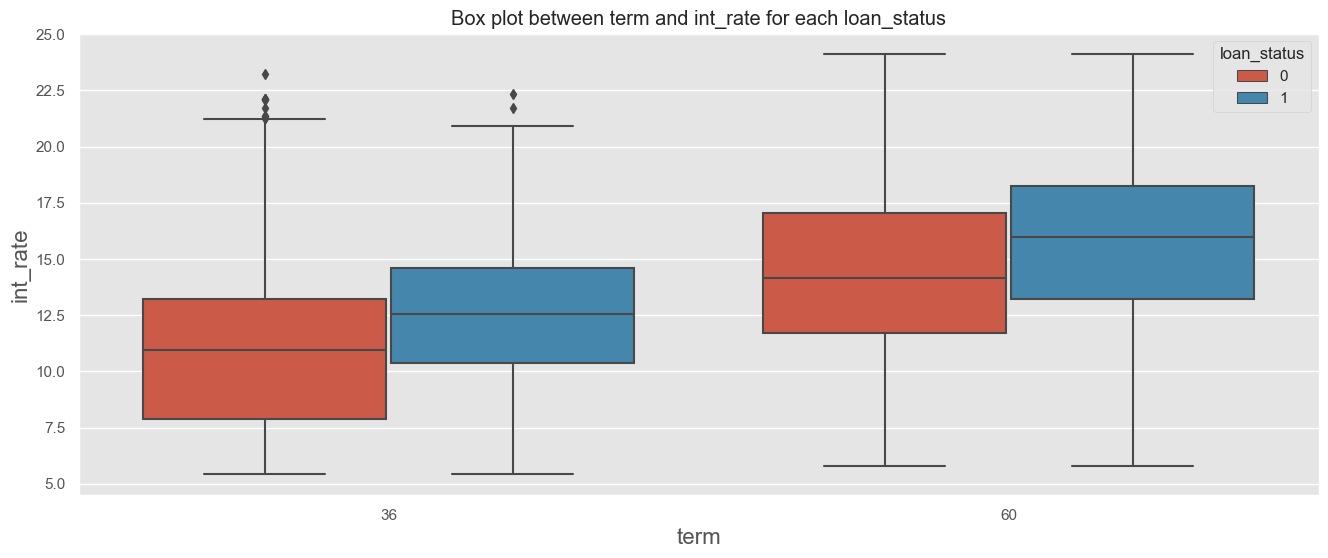

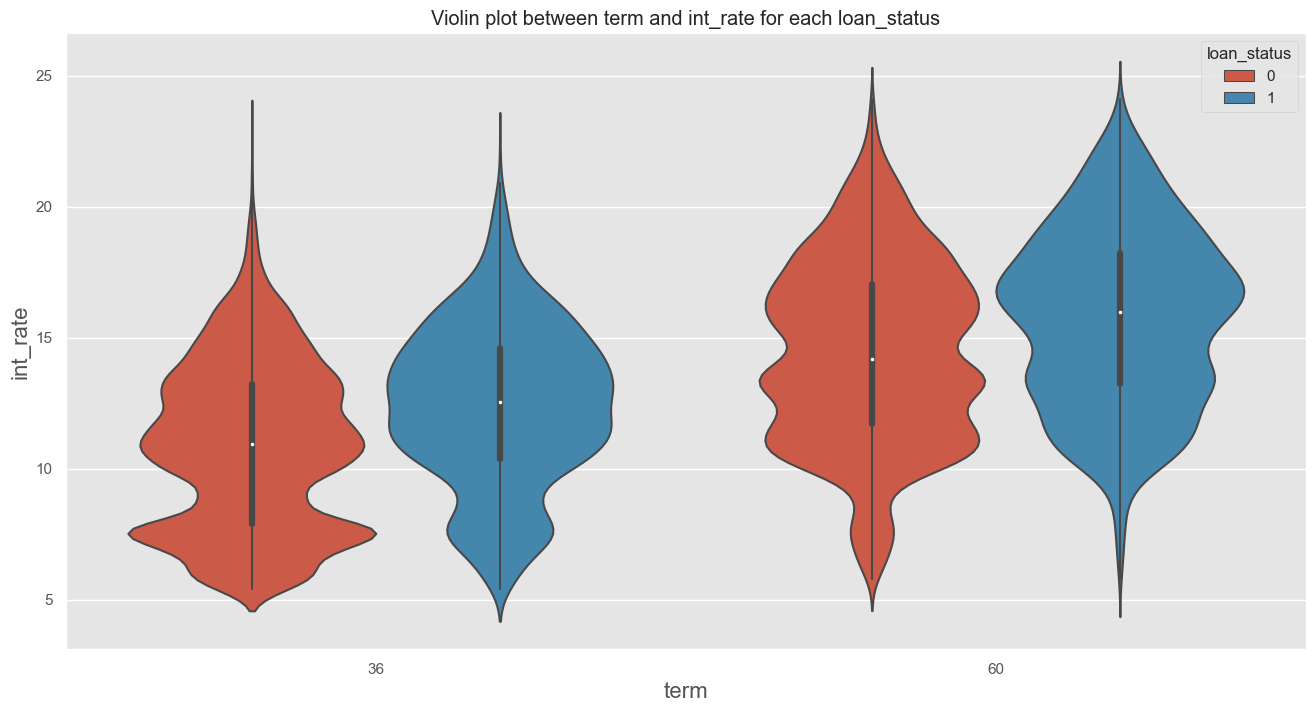

int_rate increases with term on loan and the chances of default also increases



In [51]:
#Plotting for two different features with respect to loan default ratio on 
#y-axis with Box Plots and Violin Plots.

# function to plot boxplot for comparing two features
def plotBox(x, y, hue="loan_status"):
    plt.figure(figsize=(16,6))
    sns.boxplot(x=x, y=y, data=loan, hue=hue, order=sorted(loan[x].unique()))
    plt.title("Box plot between "+x+" and "+y+" for each "+hue)
    plt.xlabel(x, fontsize=16)
    plt.ylabel(y, fontsize=16)
    plt.show()
    plt.figure(figsize=(16,8))
    sns.violinplot(x=x, y=y, data=loan, hue=hue, order=sorted(loan[x].unique()))
    plt.title("Violin plot between "+x+" and "+y+" for each "+hue)
    plt.xlabel(x, fontsize=16)
    plt.ylabel(y, fontsize=16)
    plt.show()
# plot box for term vs int_rate for each loan_status
plotBox("term", "int_rate")
print('''int_rate increases with term on loan and the chances of default also increases
''')

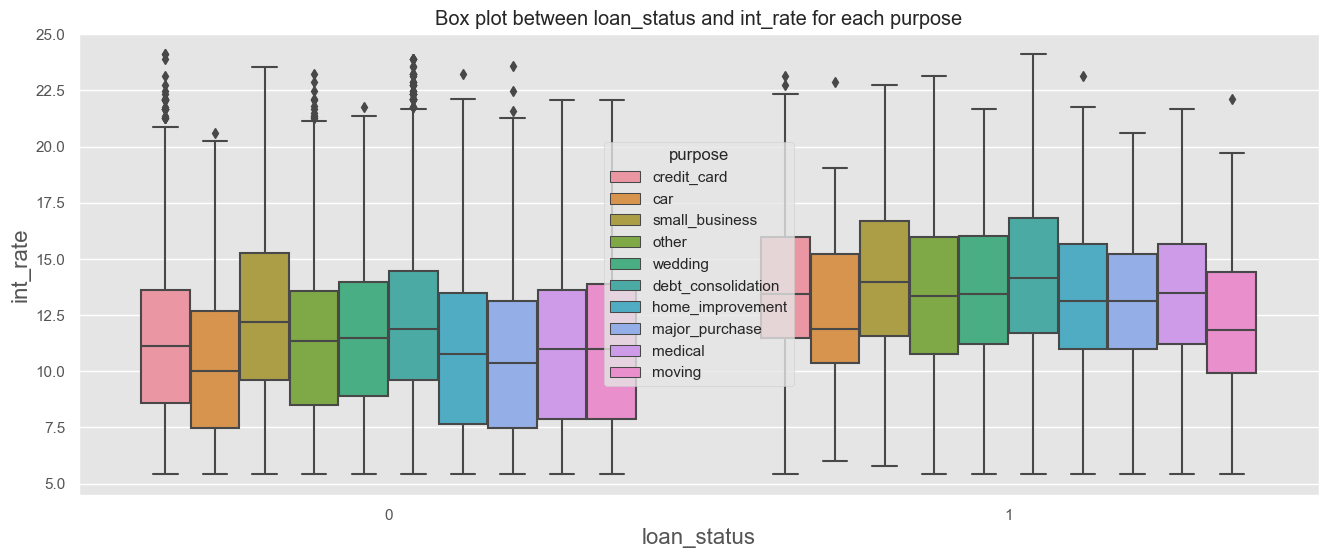

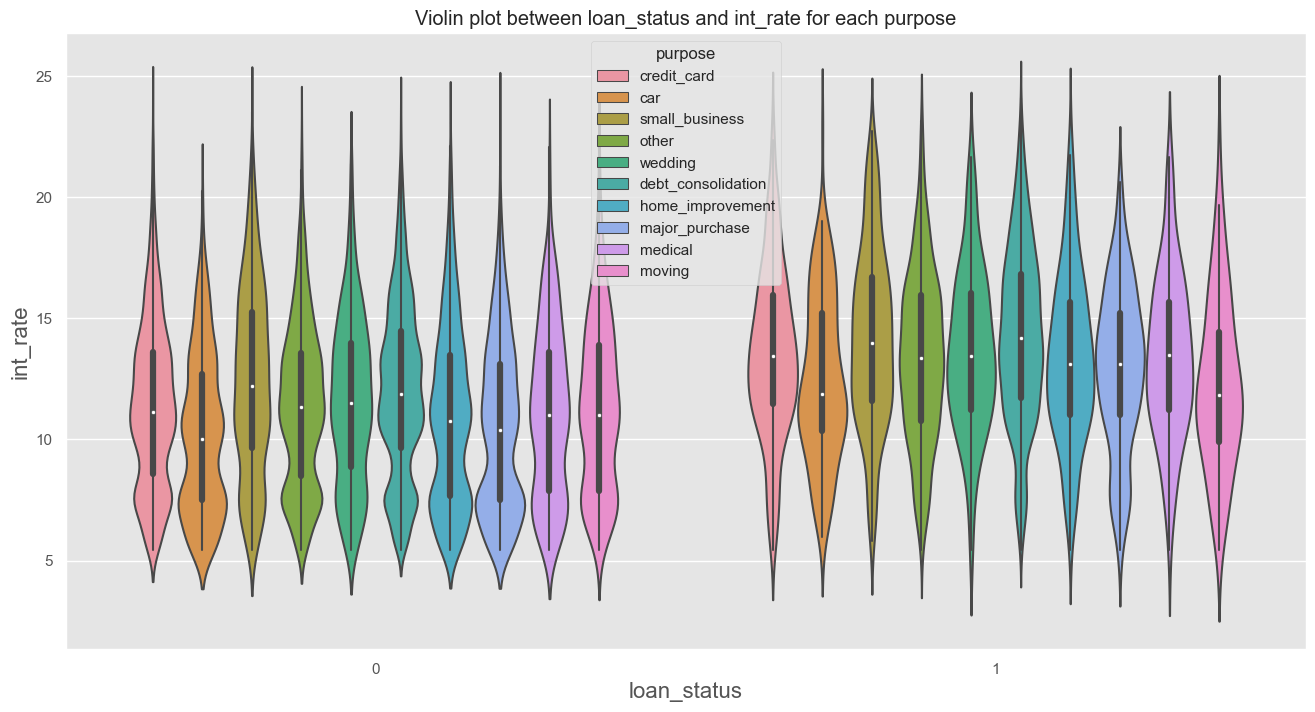

int_rate is quite high where the loan is defaulted for every purpose value



In [52]:
# plot box for loan_status vs int_rate for each purpose
plotBox("loan_status", "int_rate", hue="purpose")
print('''int_rate is quite high where the loan is defaulted for every purpose value
''')

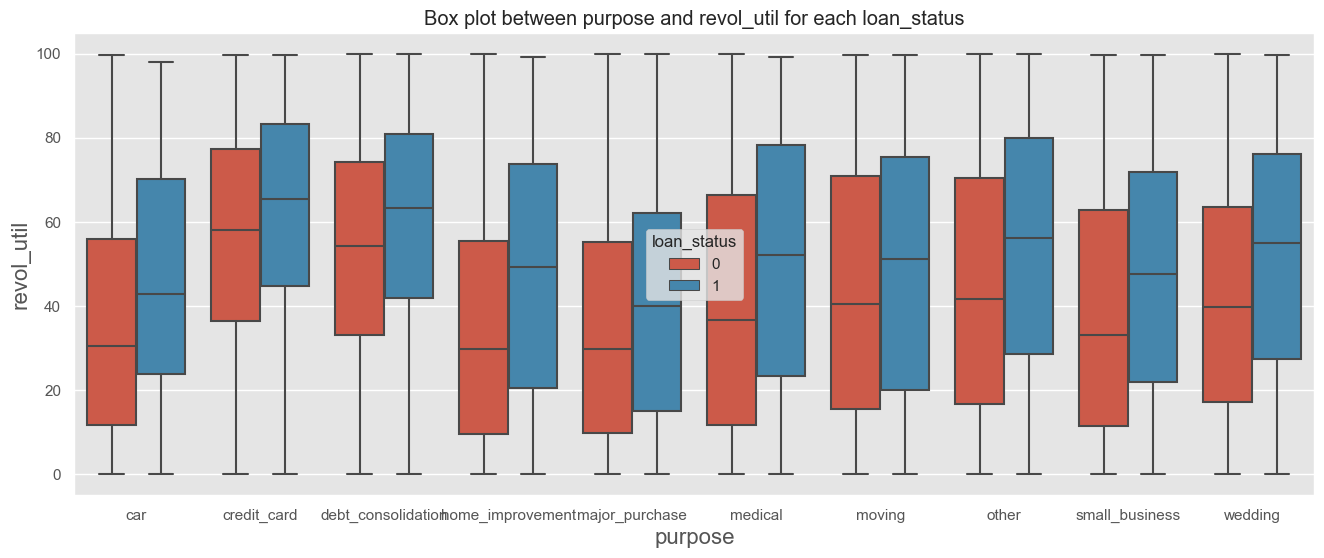

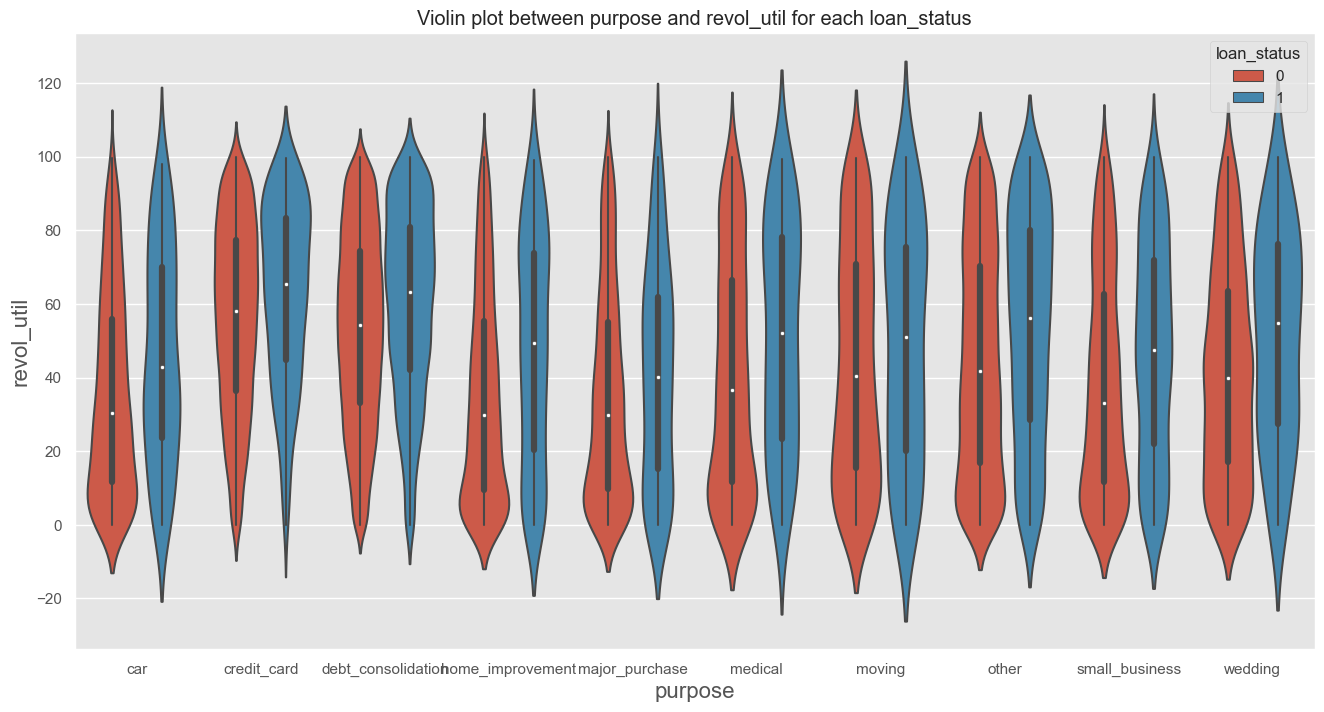

revol_util is more for every purpose value where the loan is defaulted and quite high for credit_card



In [53]:
# plot box for purpose vs revo_util for each status
plotBox("purpose", "revol_util")
print('''revol_util is more for every purpose value where the loan is defaulted and quite high for credit_card
''')

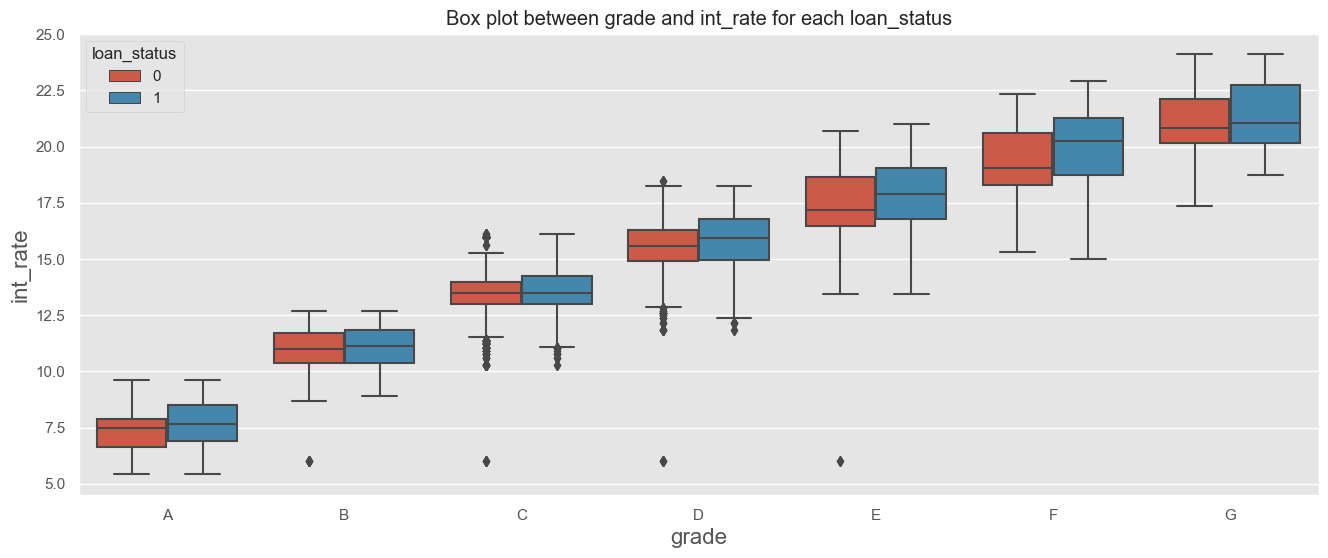

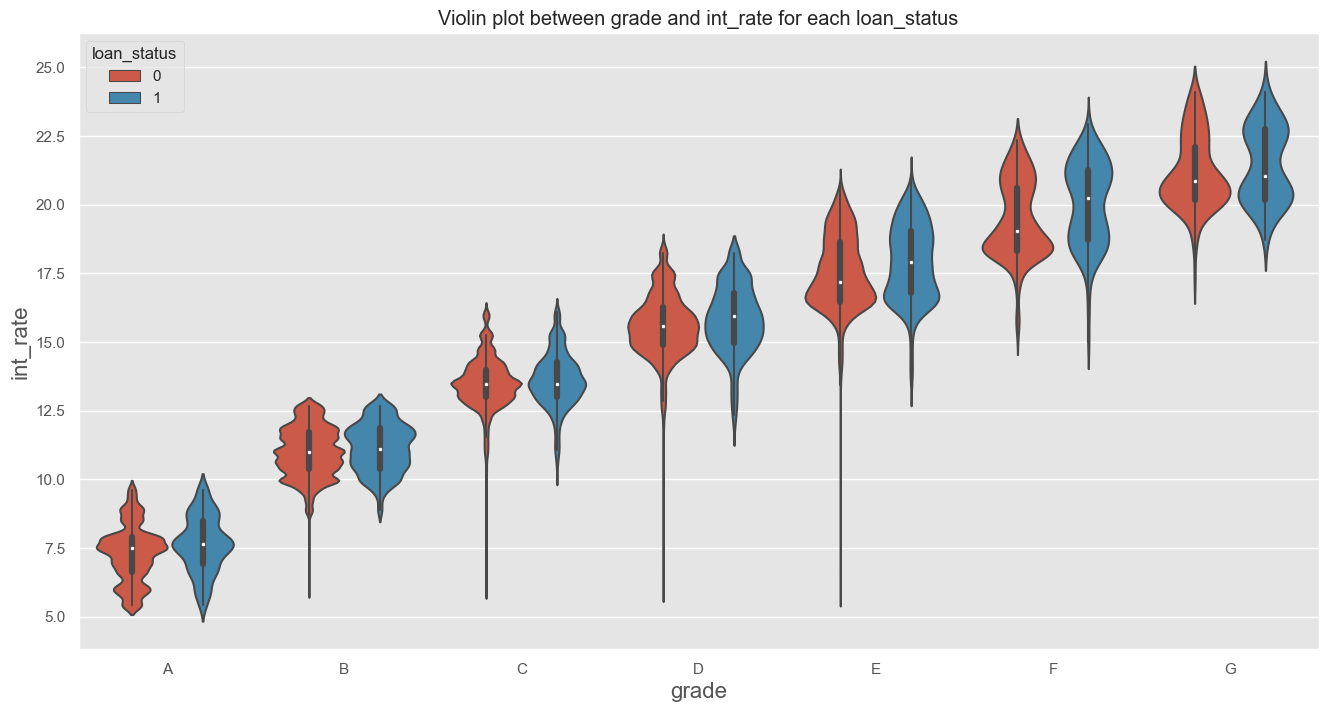

int_rate is increasing with every grade and also the defaulters for every grade are having their median near the non-defaulter 75% quantile of int_rate



In [54]:
# plot box for grade vs int_rate for each loan_status
plotBox("grade", "int_rate", "loan_status")
print('''int_rate is increasing with every grade and also the defaulters for every grade are having their median near the non-defaulter 75% quantile of int_rate
''')

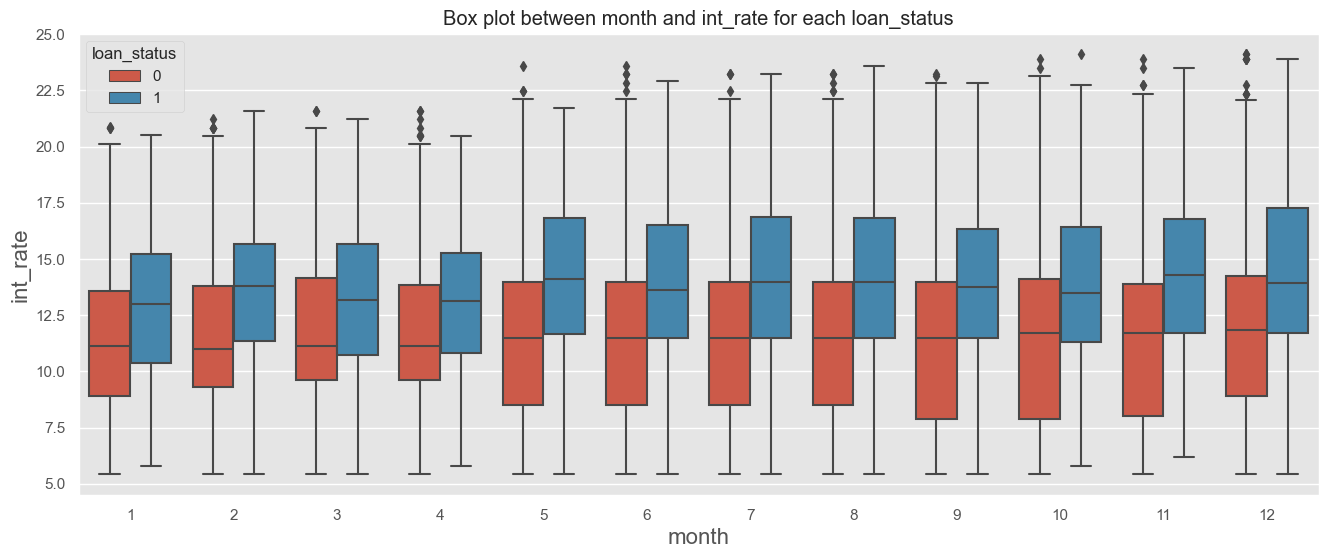

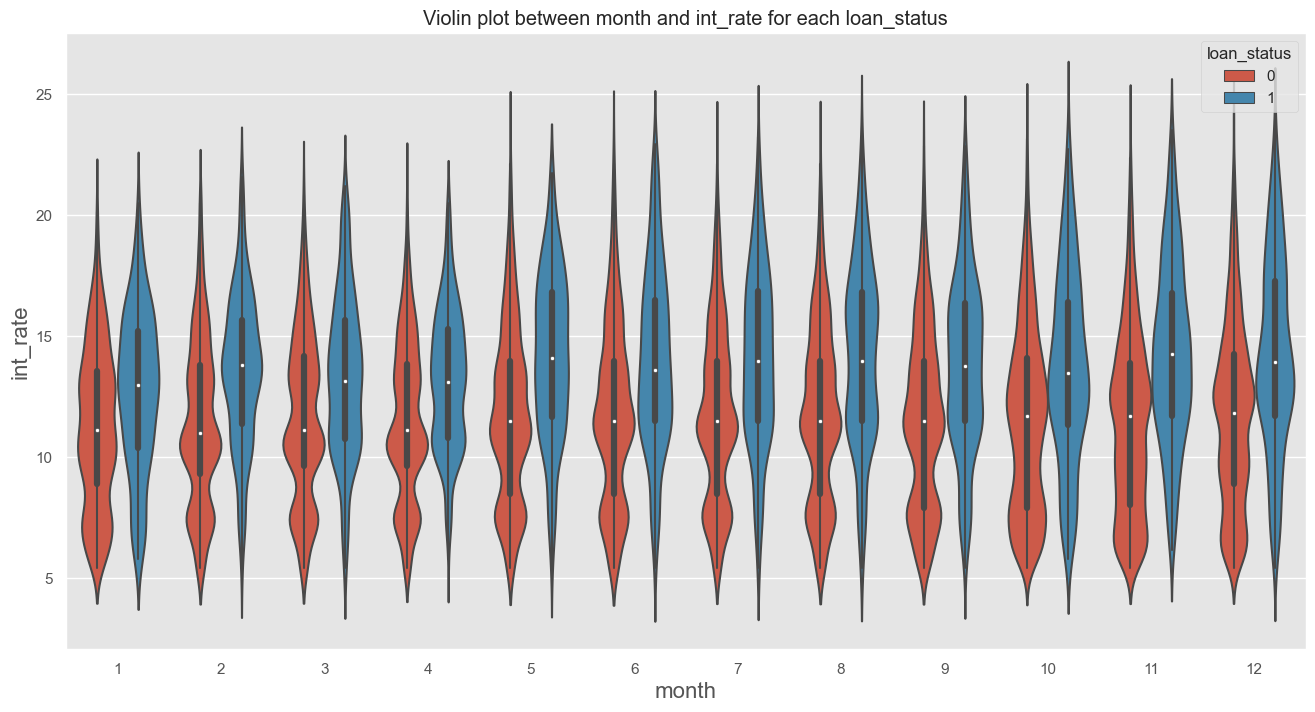

int_rate for defaulter is increasing with every month where the defaulters for every month are having their median near the non-defaulter’s 75% quantile of int_rate, but is almost constant for each month, not useful



In [55]:
# plot box for issue_d vs int_rate for each loan_status
plotBox("month", "int_rate", "loan_status")
print('''int_rate for defaulter is increasing with every month where the defaulters for every month are having their median near the non-defaulter’s 75% quantile of int_rate, but is almost constant for each month, not useful
''')

In [56]:
#Therefore, following are the important feature we deduced 
#from above Bivariate analysis:

#term, grade, purpose, pub_rec, revol_util, funded_amnt_inv, int_rate, 
#annual_inc, installment


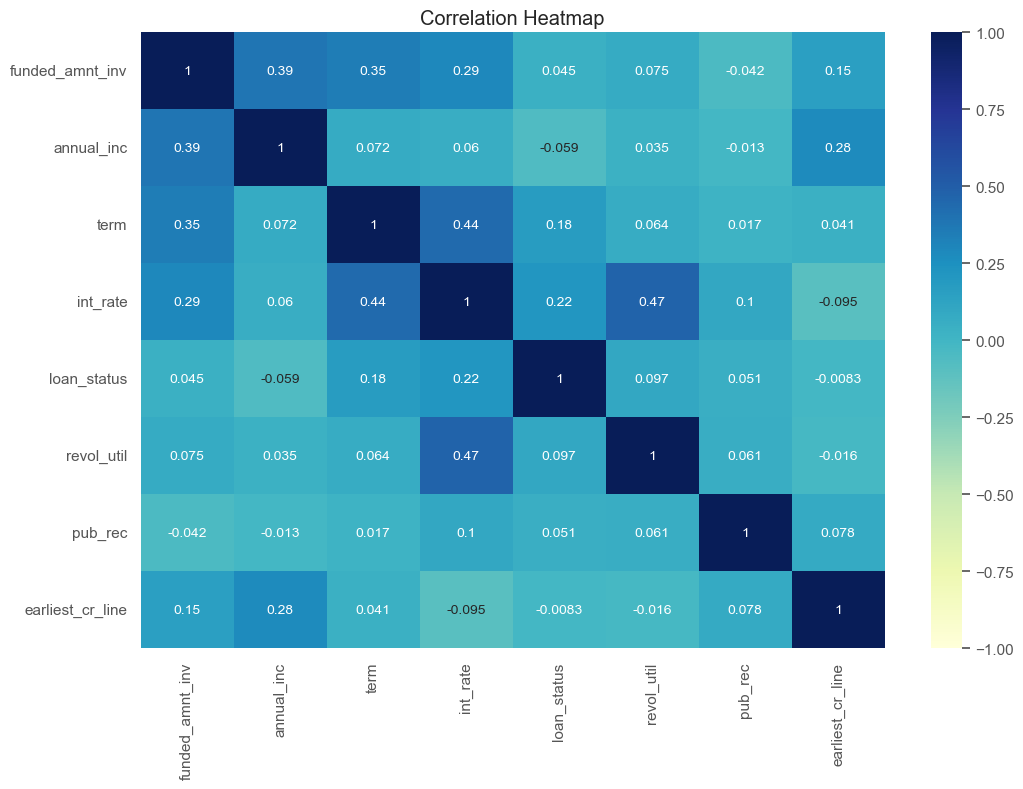

In [57]:
#Multivariate Analysis (Correlation)
# plot heat map to see correlation between features
continuous_f = ["funded_amnt_inv", "annual_inc", "term", "int_rate", "loan_status", "revol_util", "pub_rec", "earliest_cr_line"]
loan_corr = loan[continuous_f].corr()
sns.heatmap(loan_corr,vmin=-1.0,vmax=1.0,annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()


In [58]:
#Hence, important related feature from above Multivariate analysis are:

#term, grade, purpose, revol_util, int_rate, installment, annual_inc, 
#funded_amnt_inv


In [59]:
#          Final Findings

#After analysing all the related features available in the dataset, 
#we have come to an end, deducing the main driving features for 
#the Lending Club Loan Default analysis:

#The best driving features for the Loan default analysis are: 
#term, grade, purpose, revol_util, int_rate, installment, annual_inc, 
#funded_amnt_inv